# System Identification (Painter Street Overpass)

![Painter Street Overpass (Rio Dell Hwy)](ll89324_2.svg)

In [1]:
import numpy as np
import quakeio
import quakeio.processing as spec

In [2]:
# file_name  = "../dat/tomsplace_26nov2006_ce54730p.zip"
file_name = "../dat/RioDell_Petrolia_Processed_Data.zip"
collection = quakeio.read(file_name, "csmip.zip")

## System Identification


Case 1
: Input in transverse direction, output in transverse direction
  >Input channels: 3; Output channels: 7
        
Case 2
: Input in longitudinal direction, output in longitudinal direction
  >Input channels: 1; Output channel: 11
        
Case 3
: Input in longitudinal direction, output in vertical direction
  Considering that the bridge is similar to a frame in the longitudinal direction, 
  shaking along this direction results in long. translational accelerations as well
  as bending & rotation of the deck, causing vertical accelerations on deck nodes.
  Case 3 makes use of this behavior to identify the long. mode. The influence vector
  of long. ground motions on vertical accelerations is zero, which is a concern,
  but this is still a useful case. 
  >Input channels: 1; Output channels: 6

Case 4
: Input in longitudinal direction, output in longitudinal & vertical directions.
  This is a case that can only be applied to OKID-ERA-DC. Therefore, it is the same
  as Case 3 in TFE, and similar to Case 3 in OKID-ERA-DC, except that the output
  channels is a combination of longitudinal & vertical channels.
  >Input channels: 1; Output channels: 6

Case 5
: Input in vertical direction, output in vertical direction
  >Input channels: 2; Output channel: 6


In [3]:
cases = {
    "1": ("3",  "7"),
    "2": ("2", "11"),
    "3": ("1",  "6"),
    "4": ("2",  "6")
}


The `TransferFunction` class is used to compute the transfer function 
between two channels at a specified damping ratio.

<!-- & Fourier Amplitude (FA) 
spectrum. A very small damping ratio is used such that the response spectrum & TF
are not affected by the damping ratio. -->

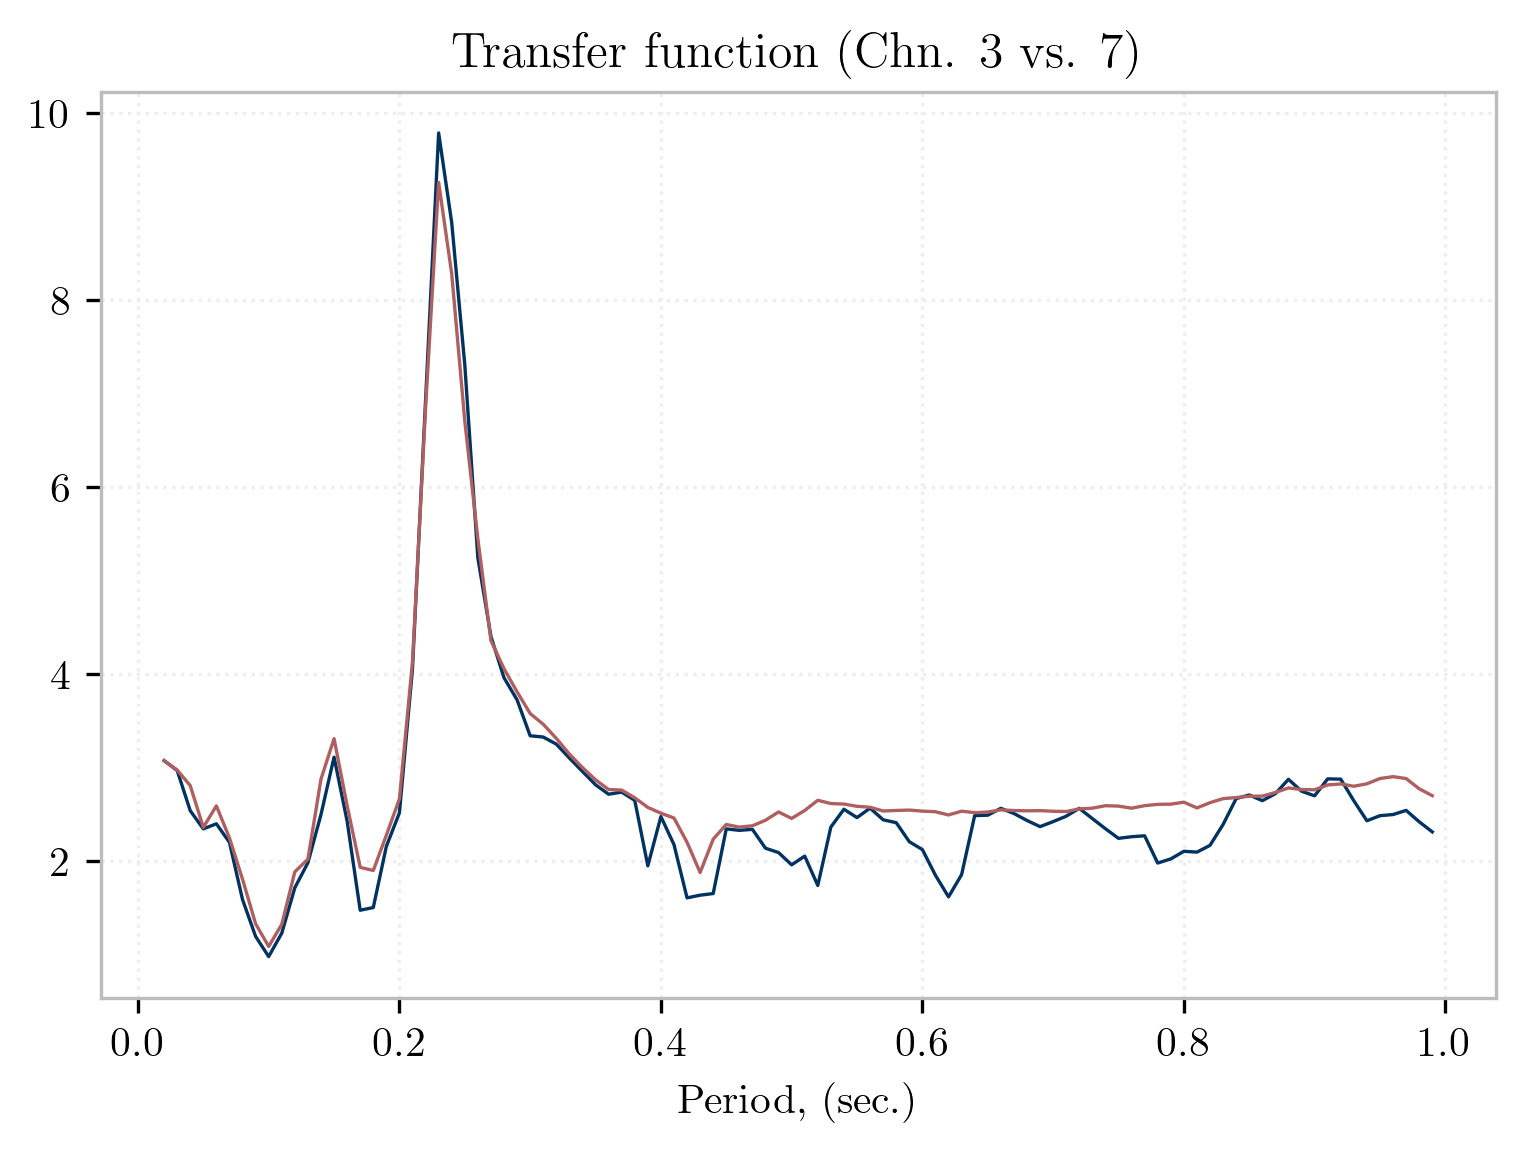

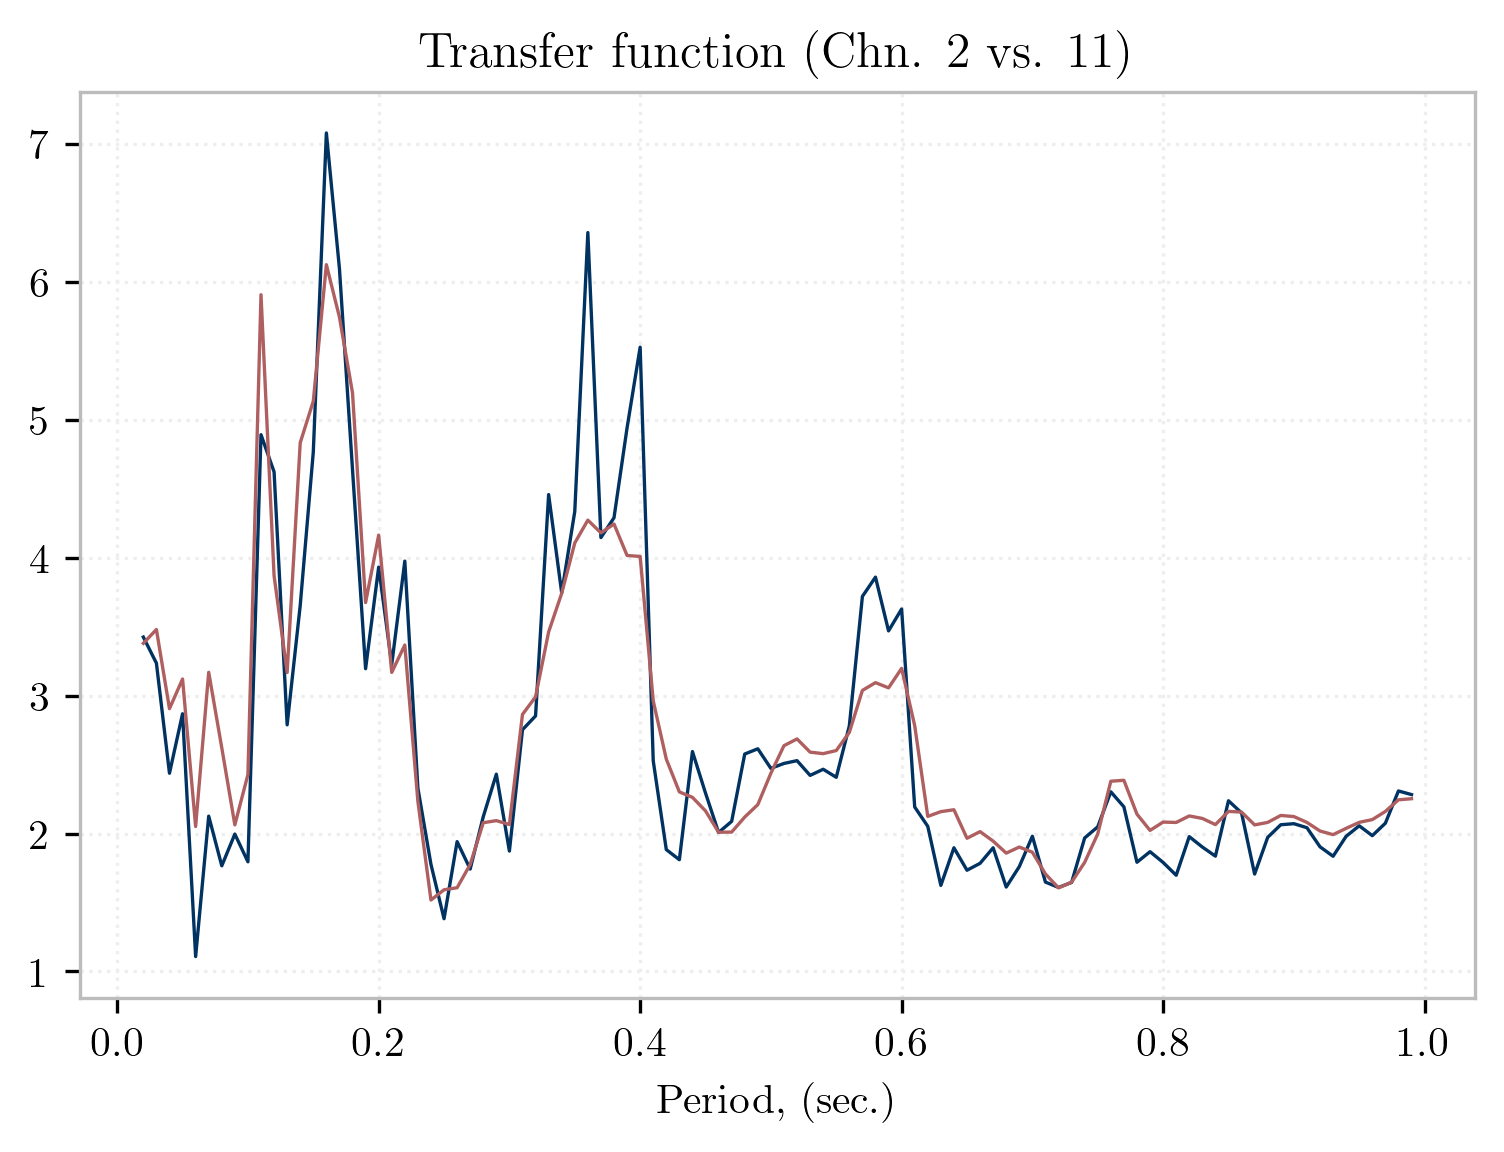

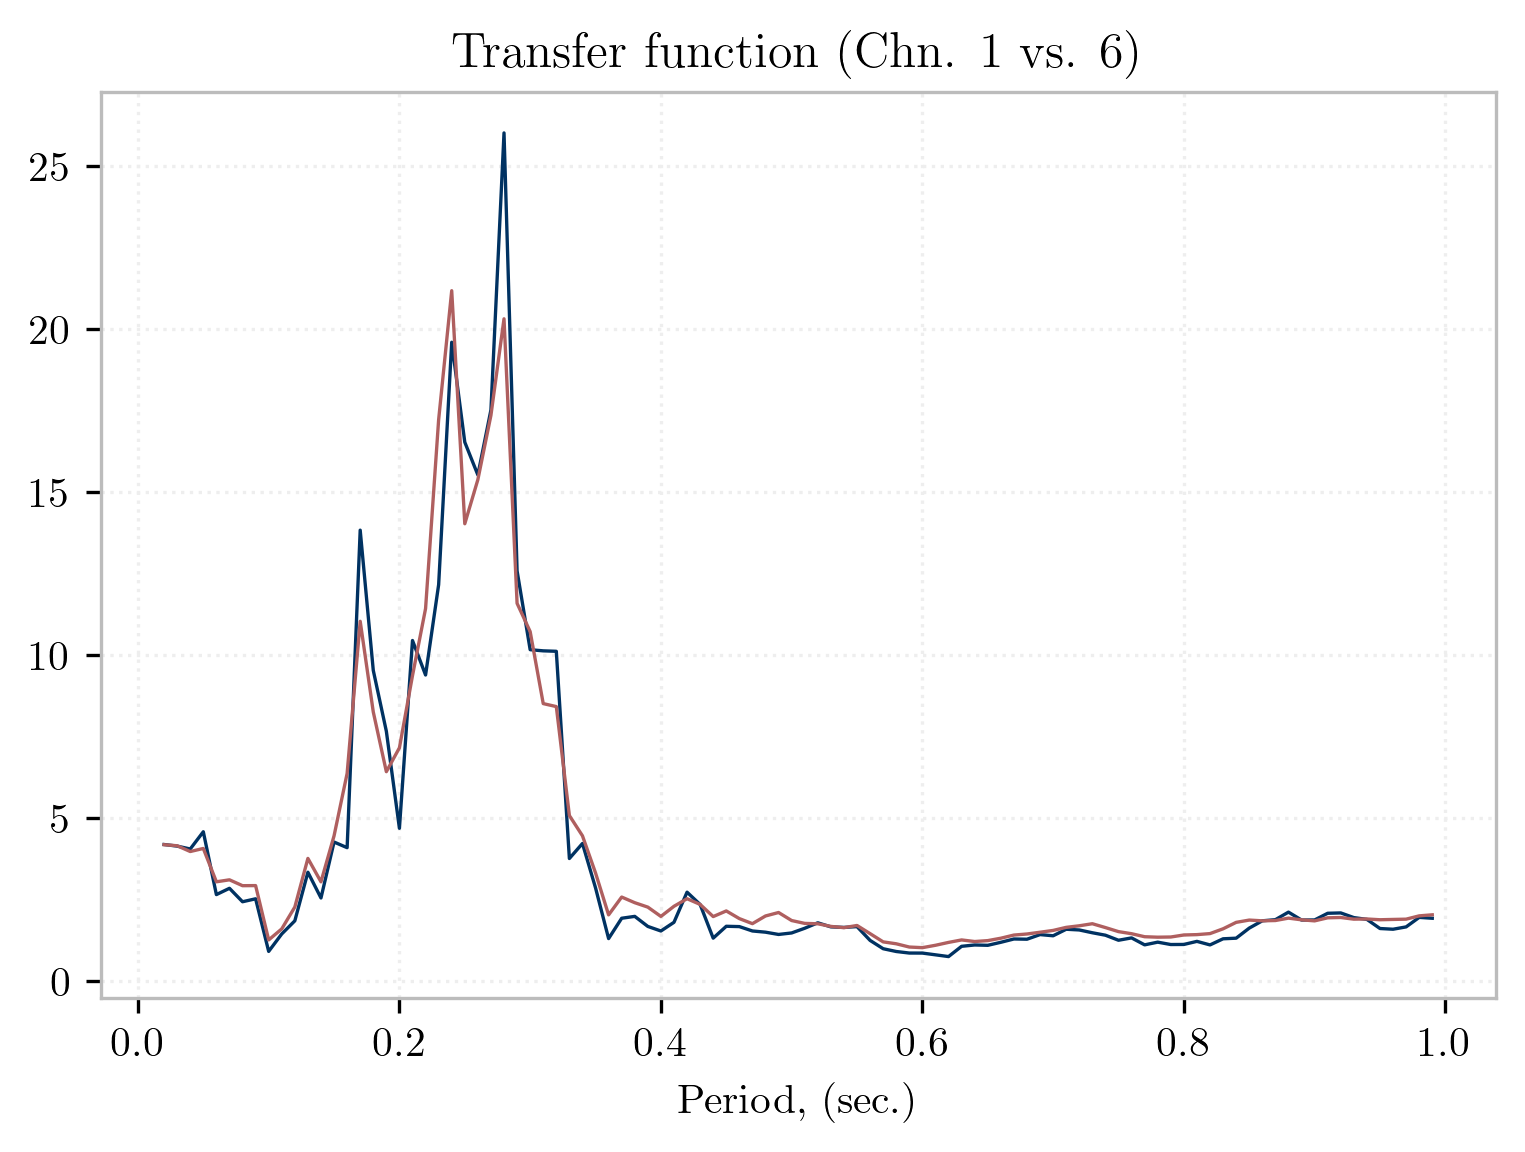

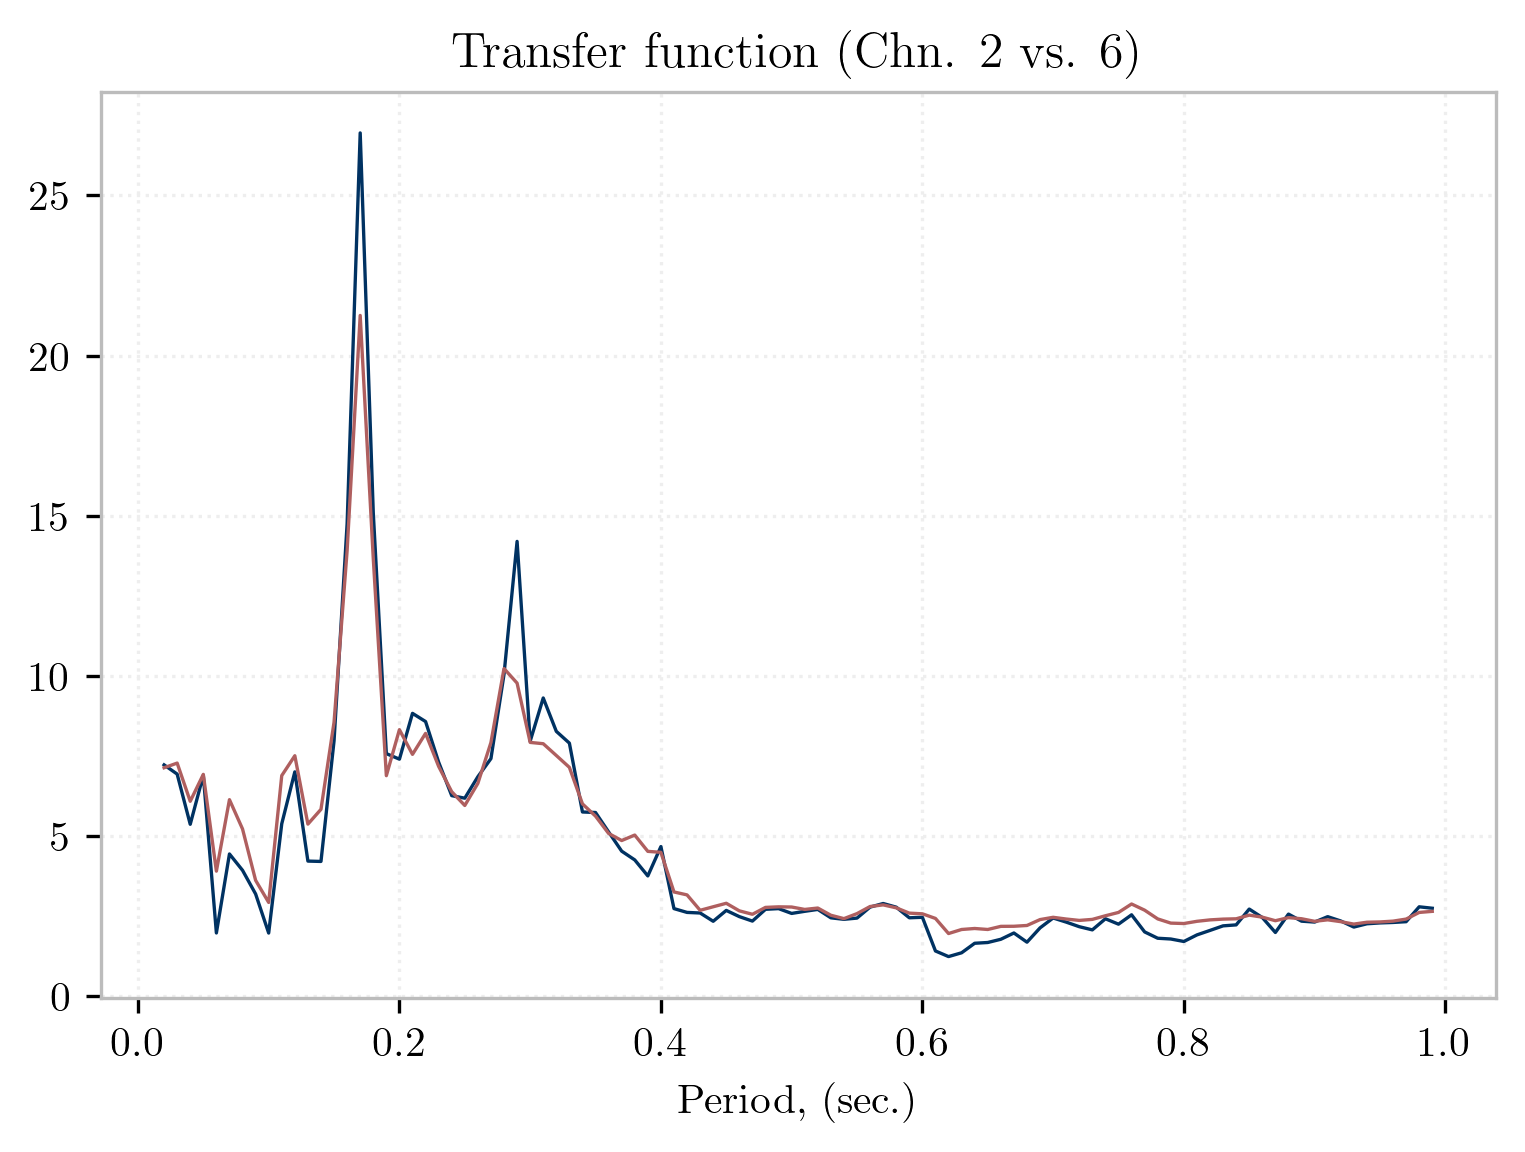

In [4]:
for pair in cases.values():
    inp = collection.at(channel=pair[0])
    out = collection.at(channel=pair[1])
    tf = spec.TransferFunction((inp,out), damping=[0.001, 0.01]).plot()

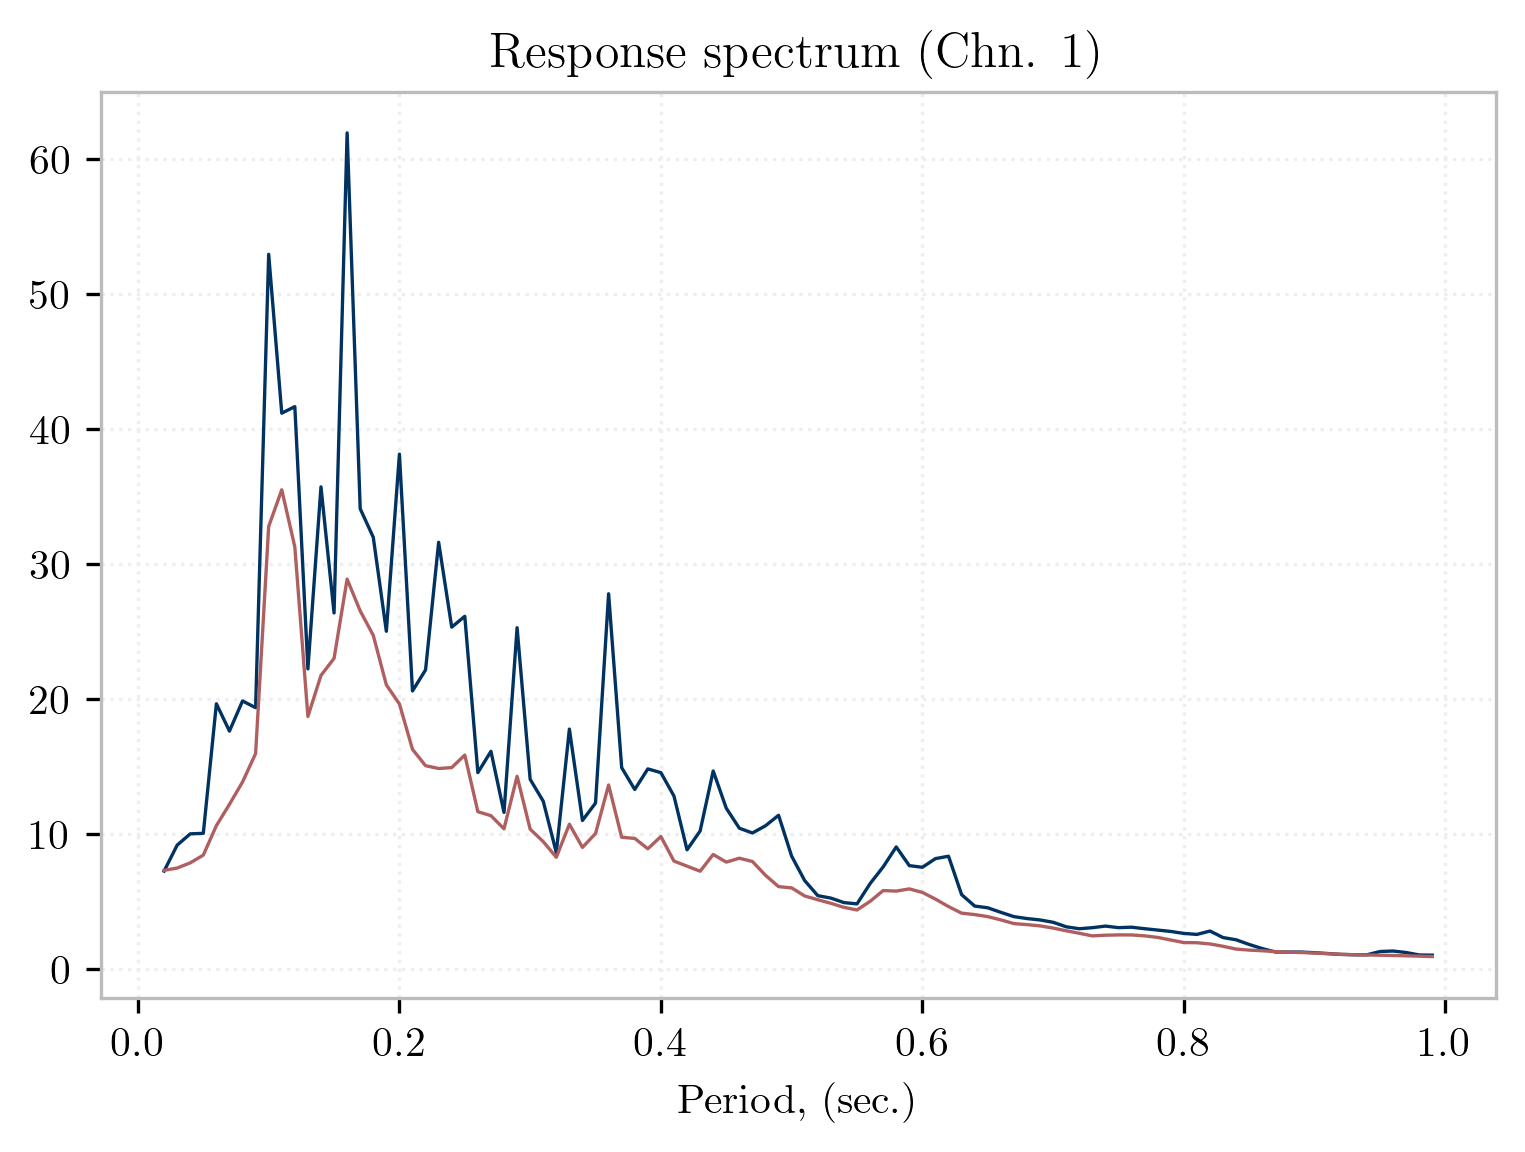

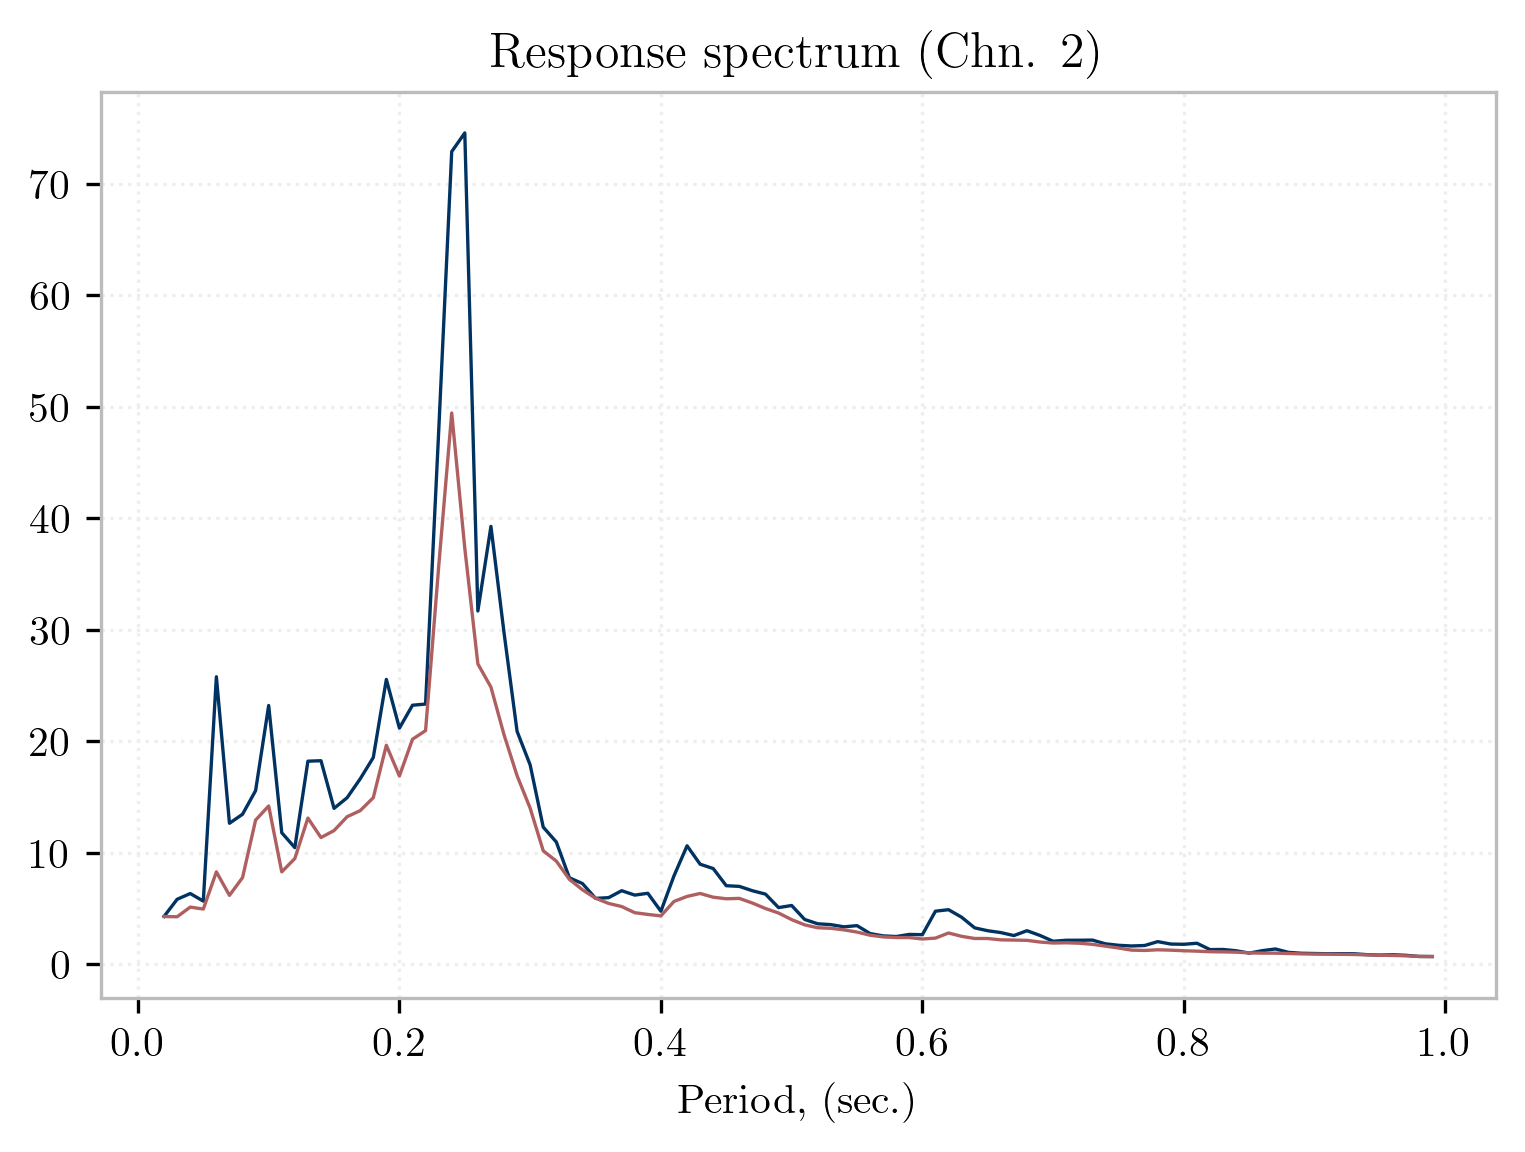

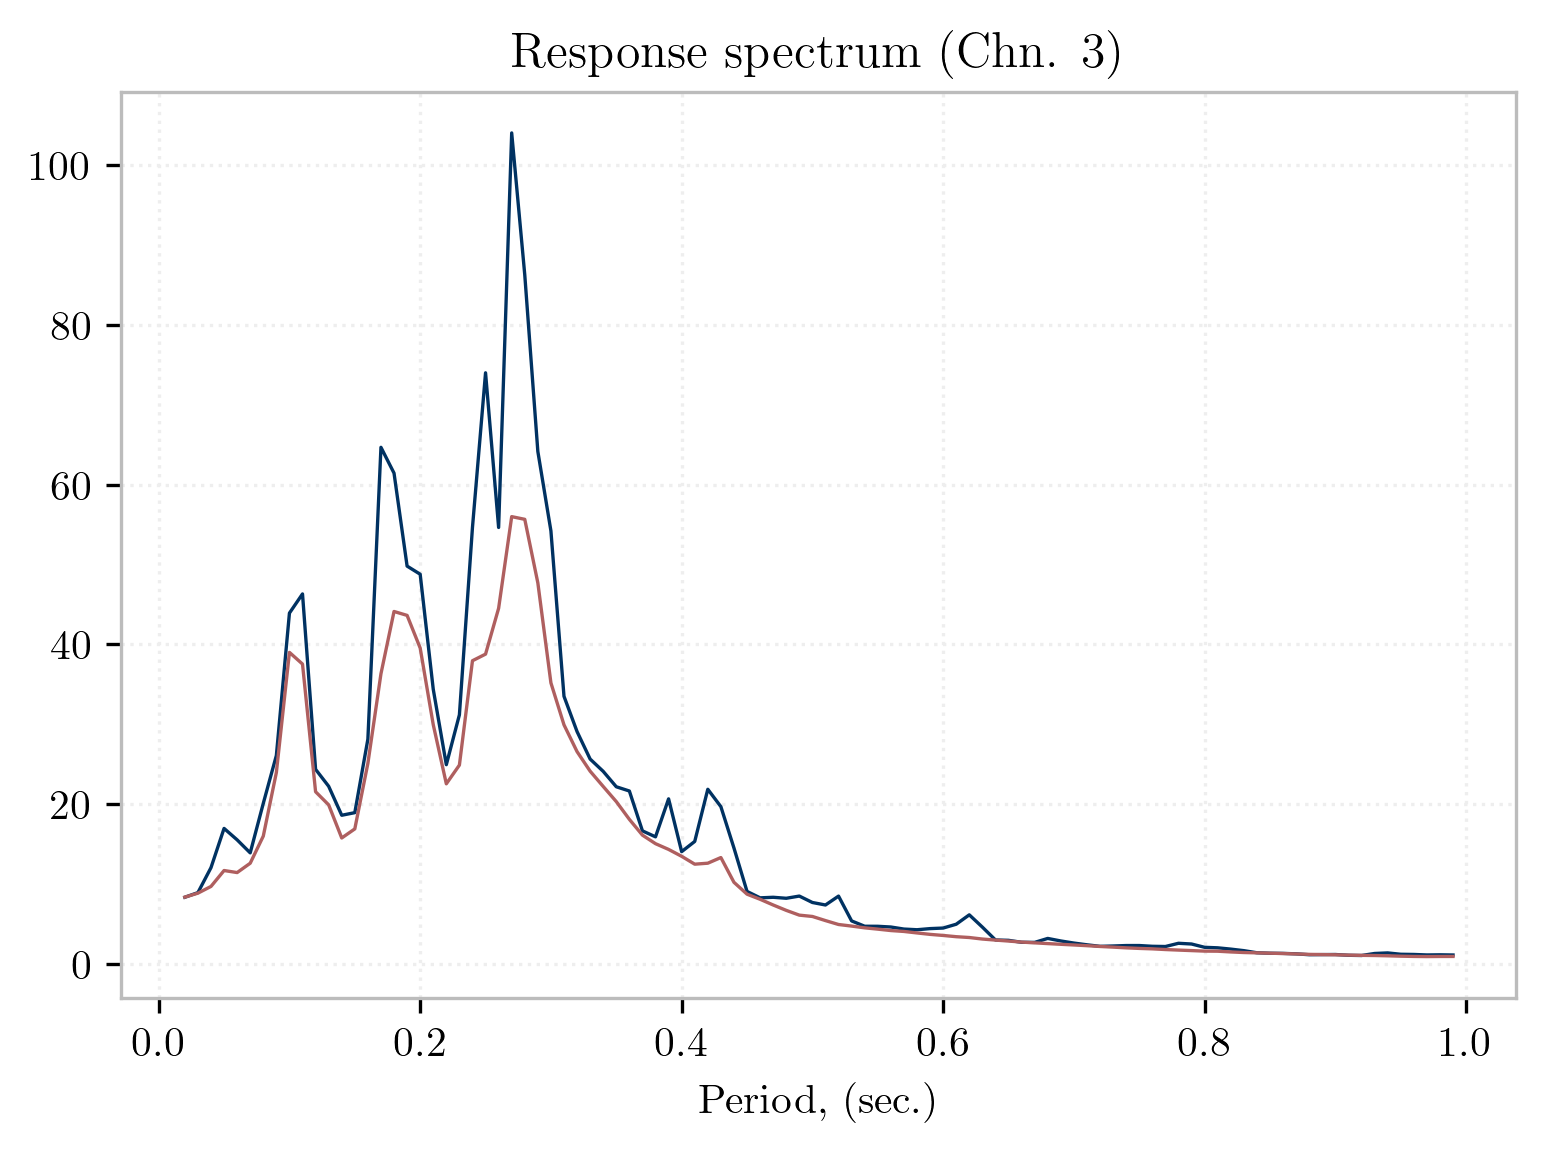

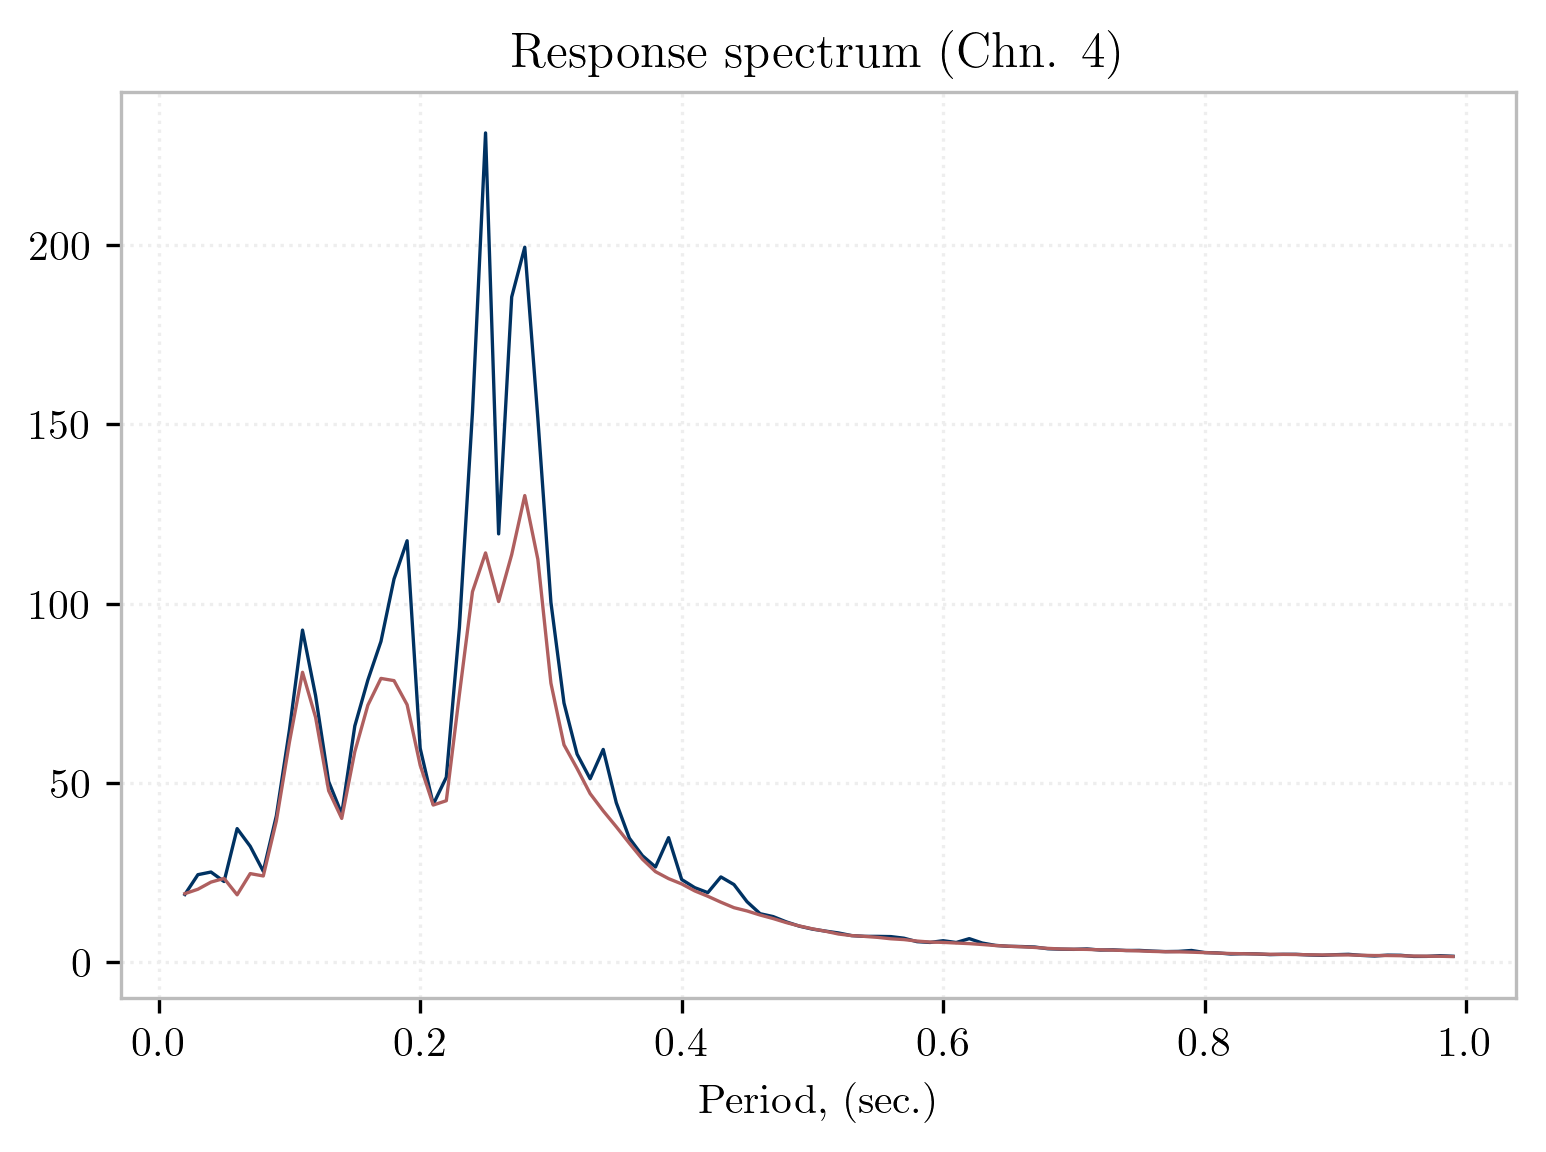

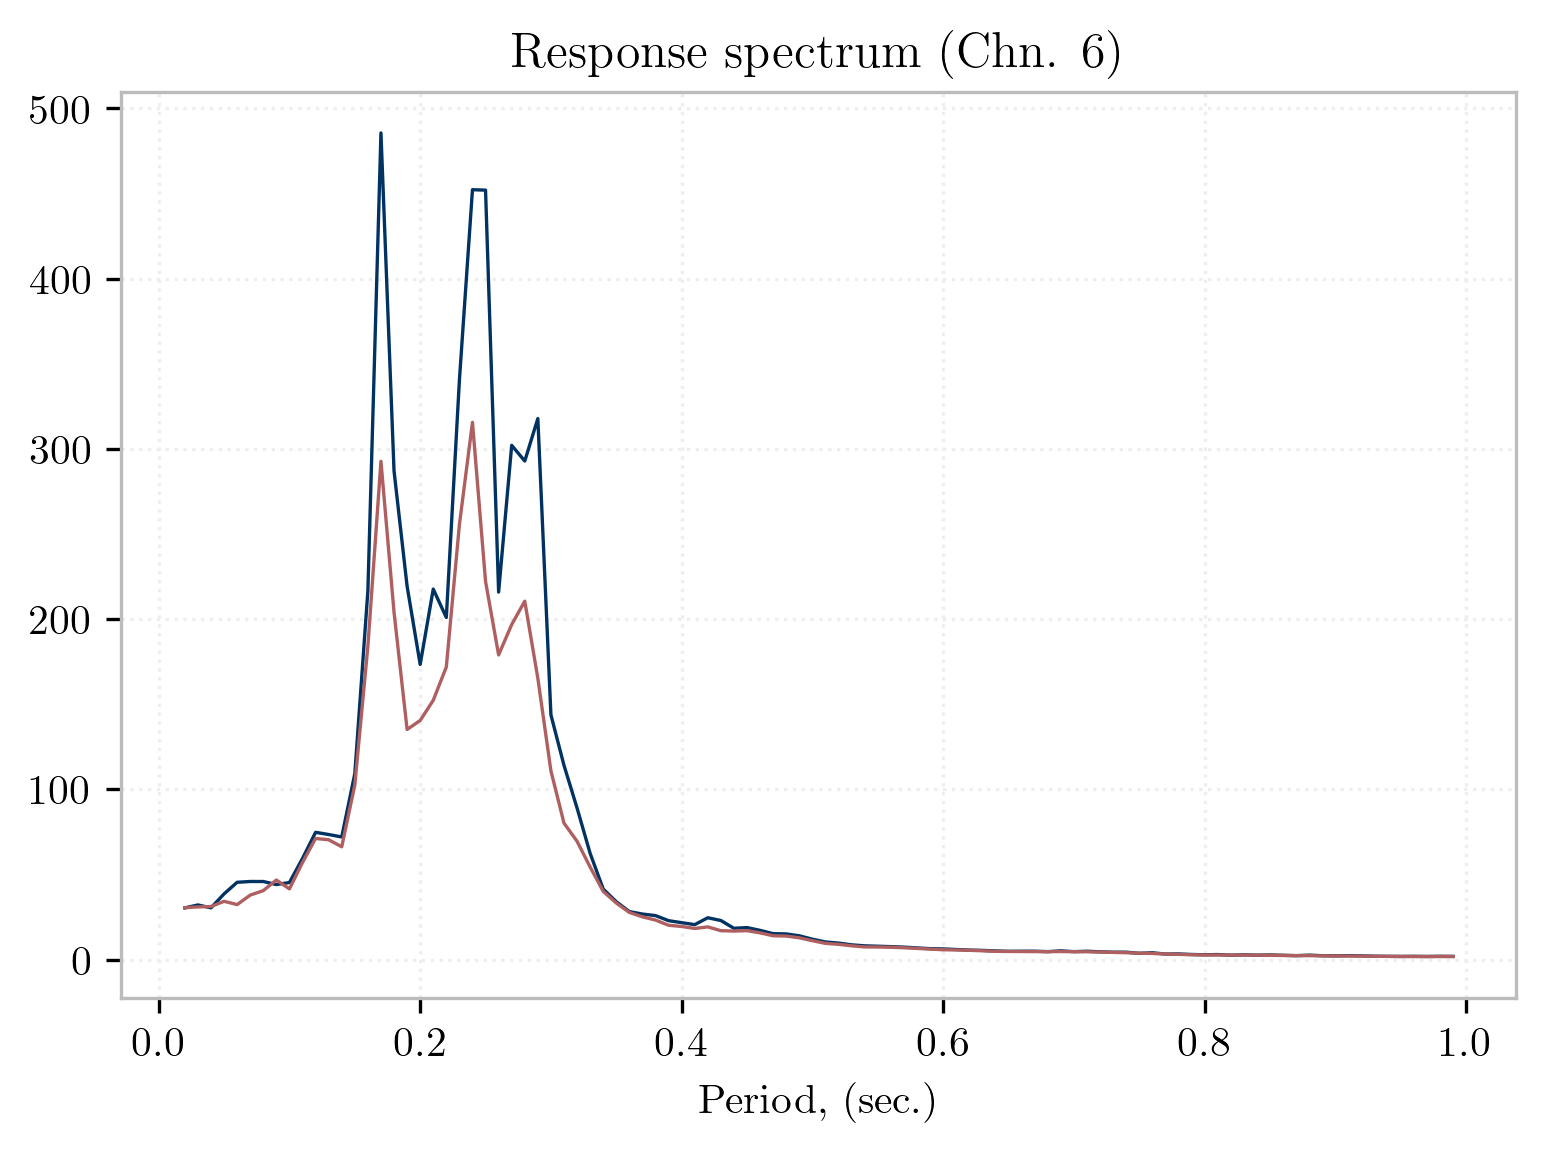

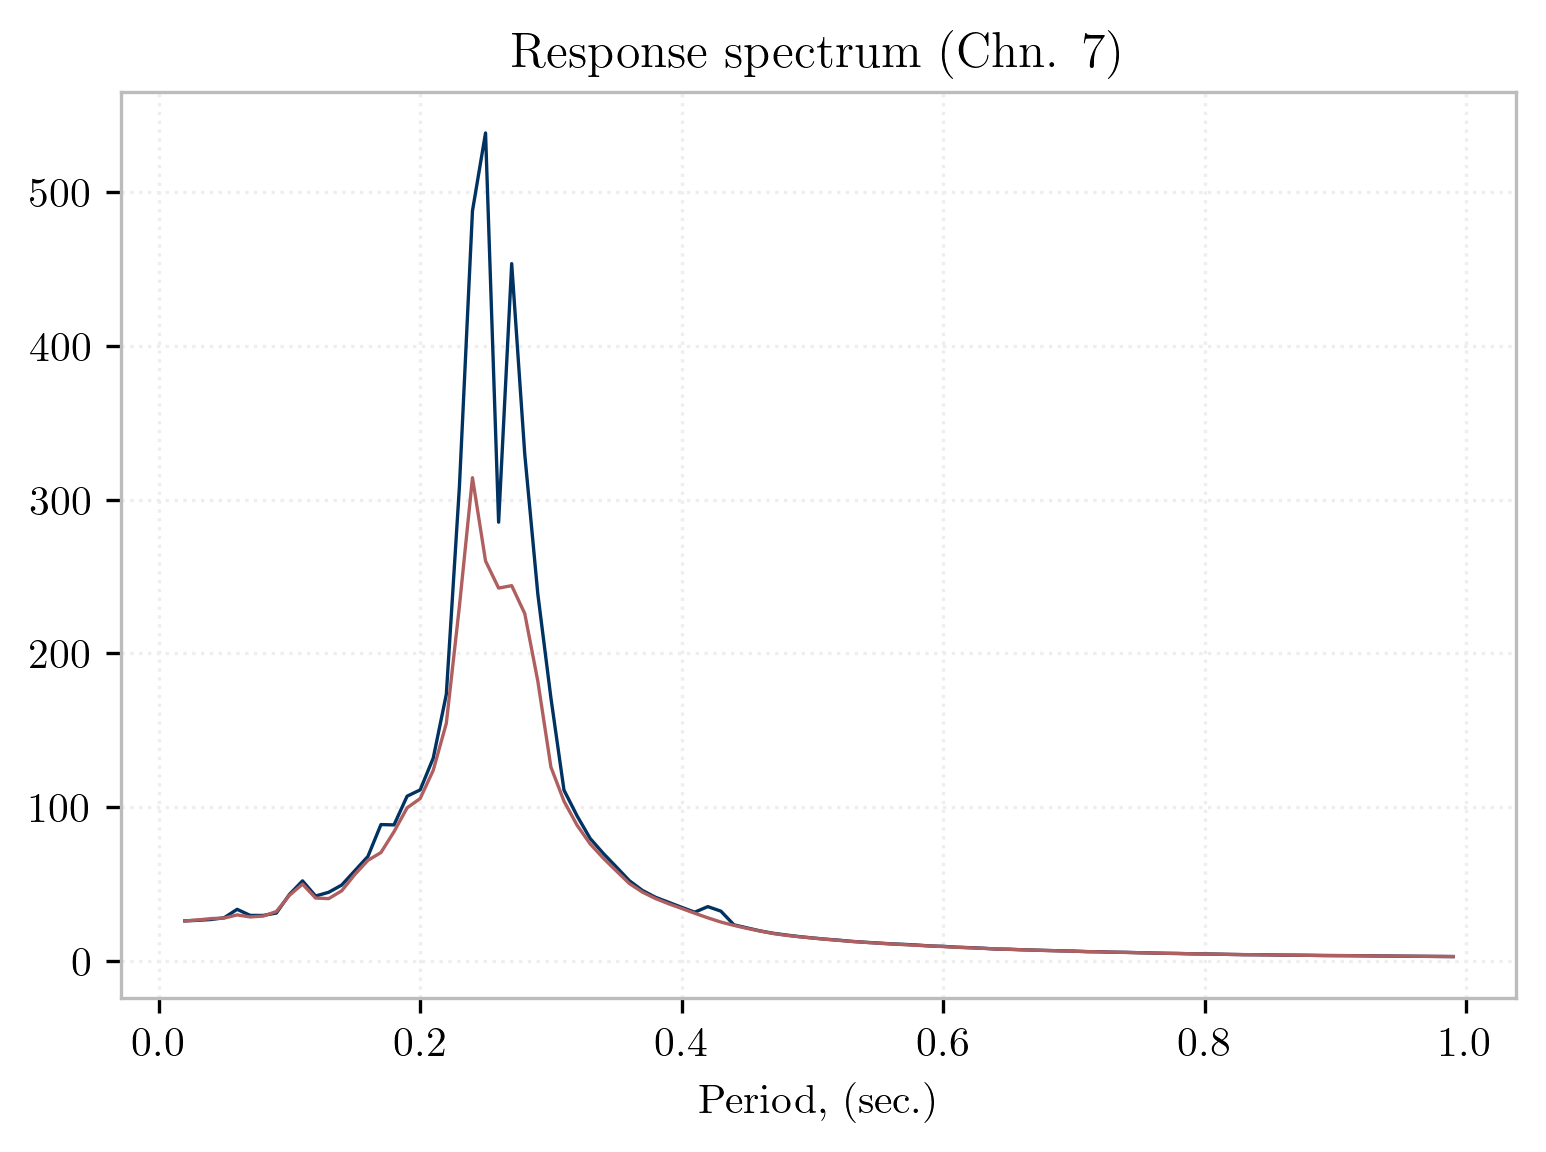

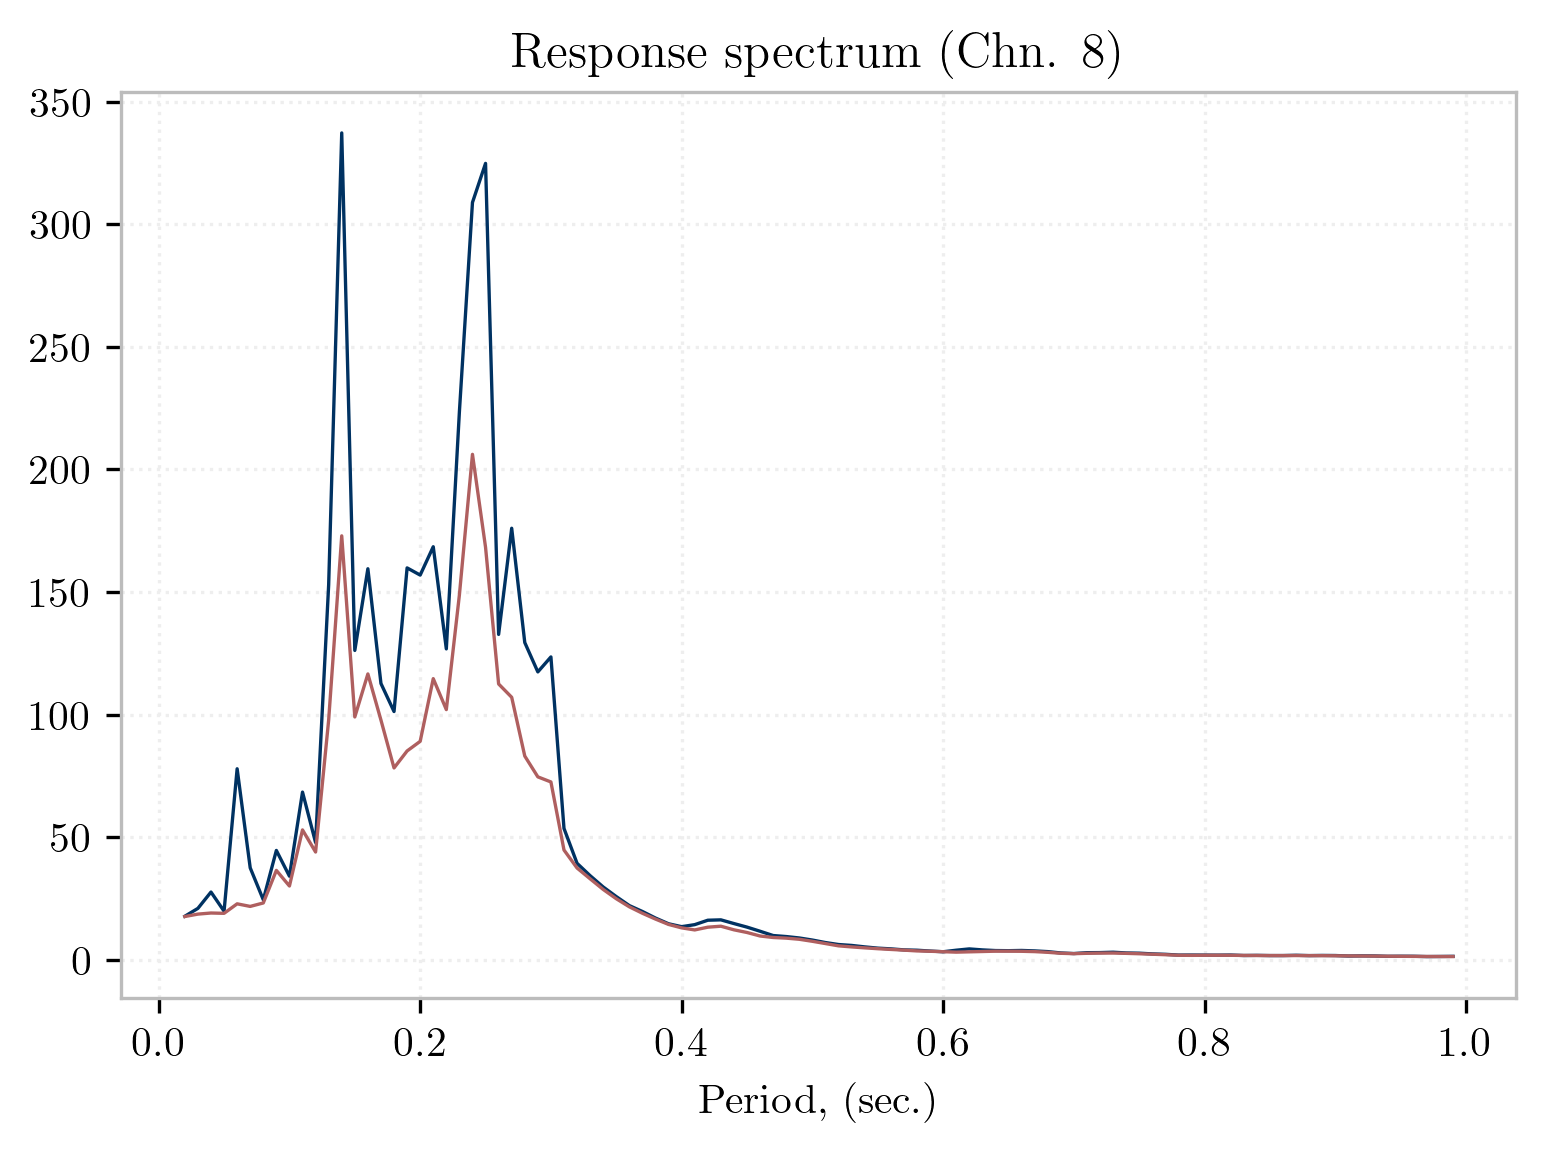

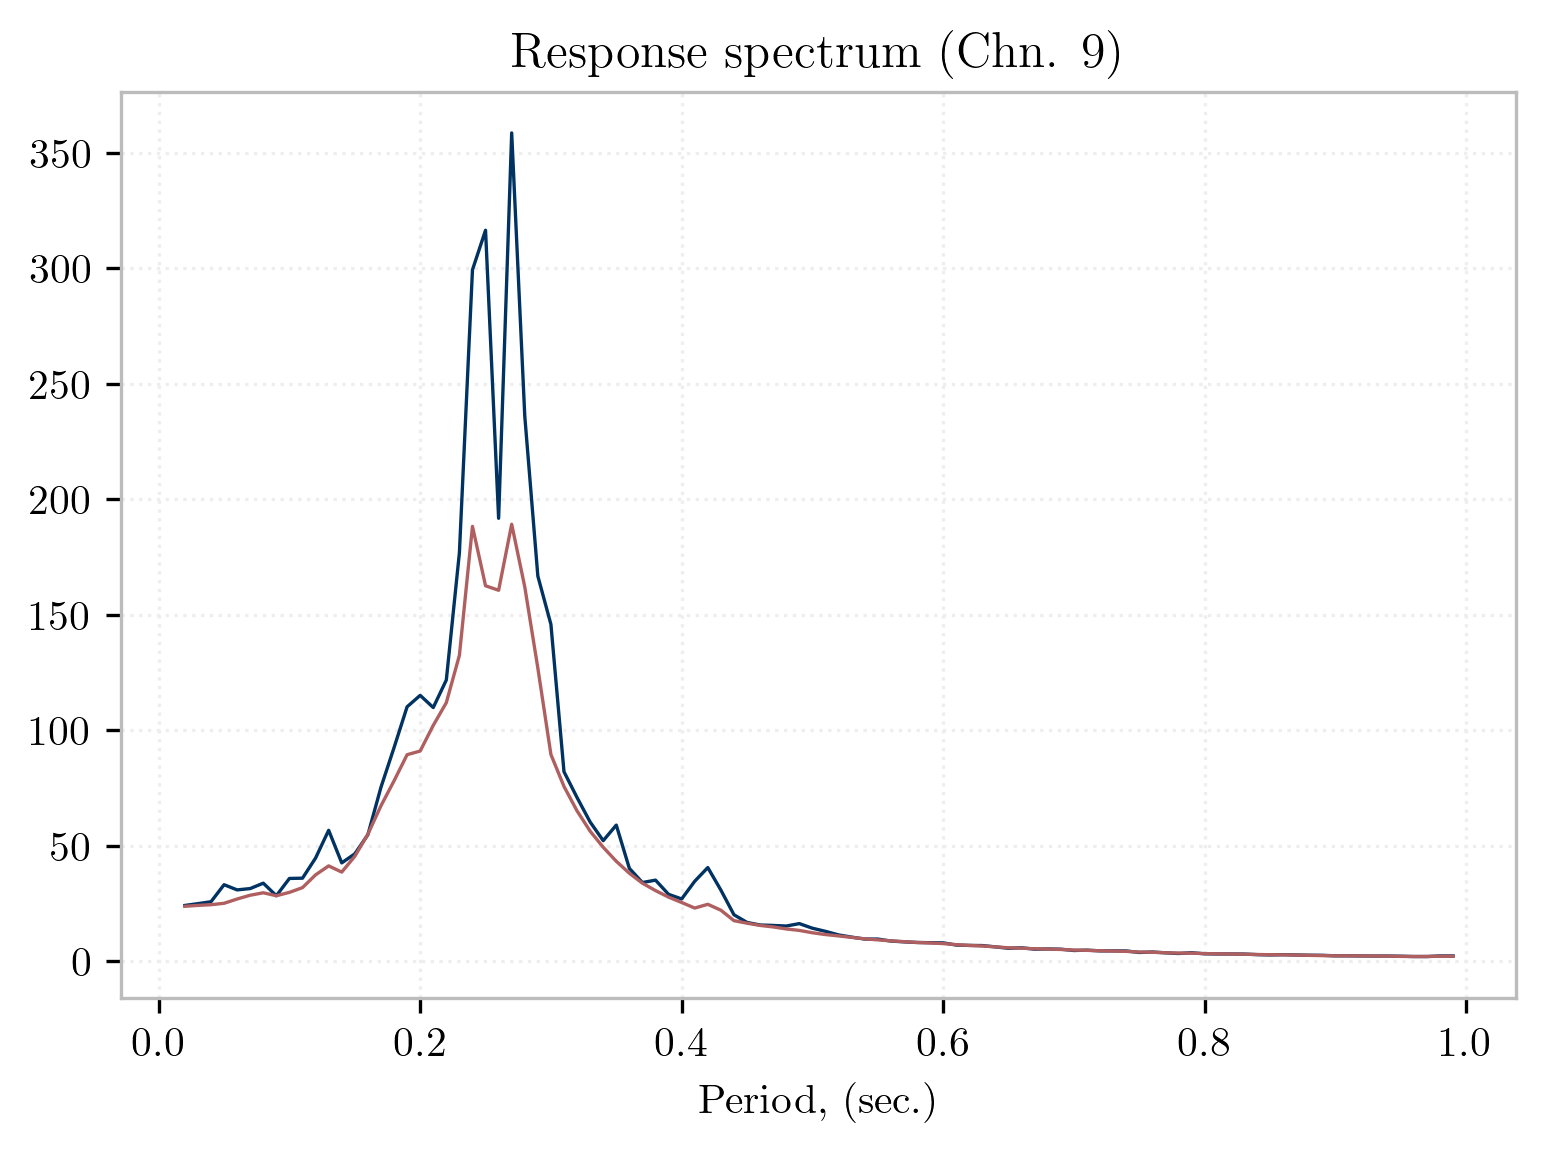

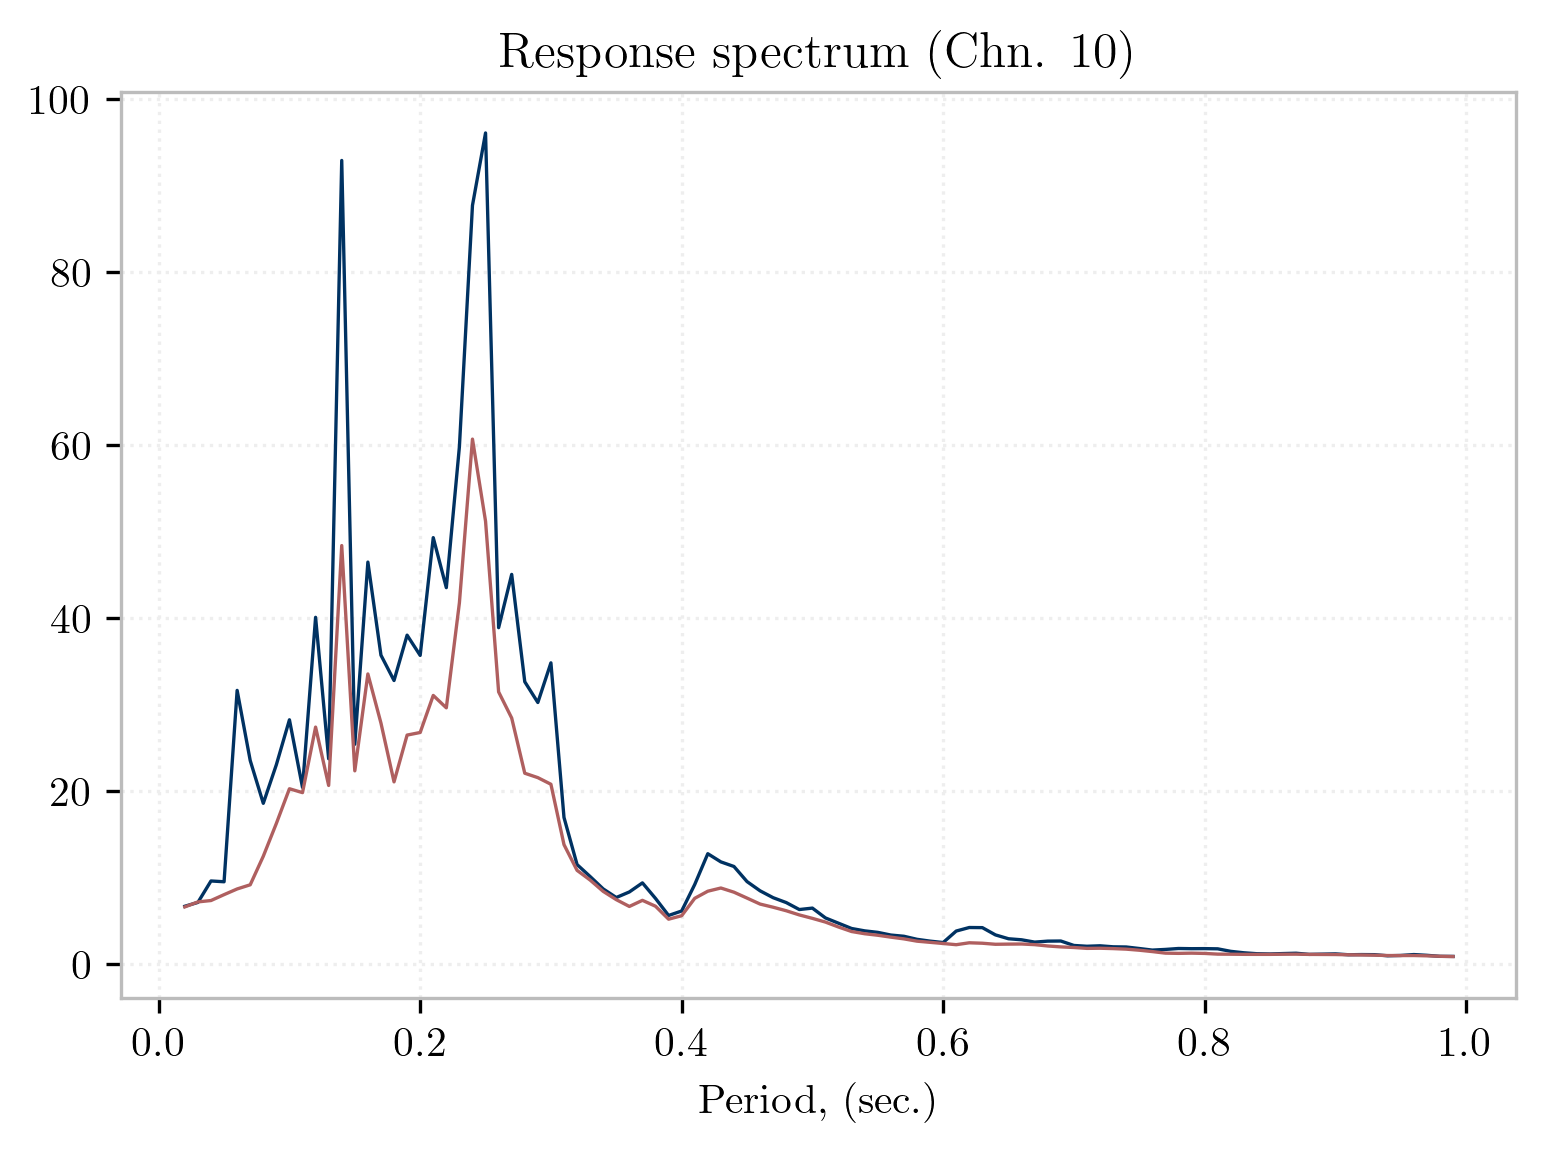

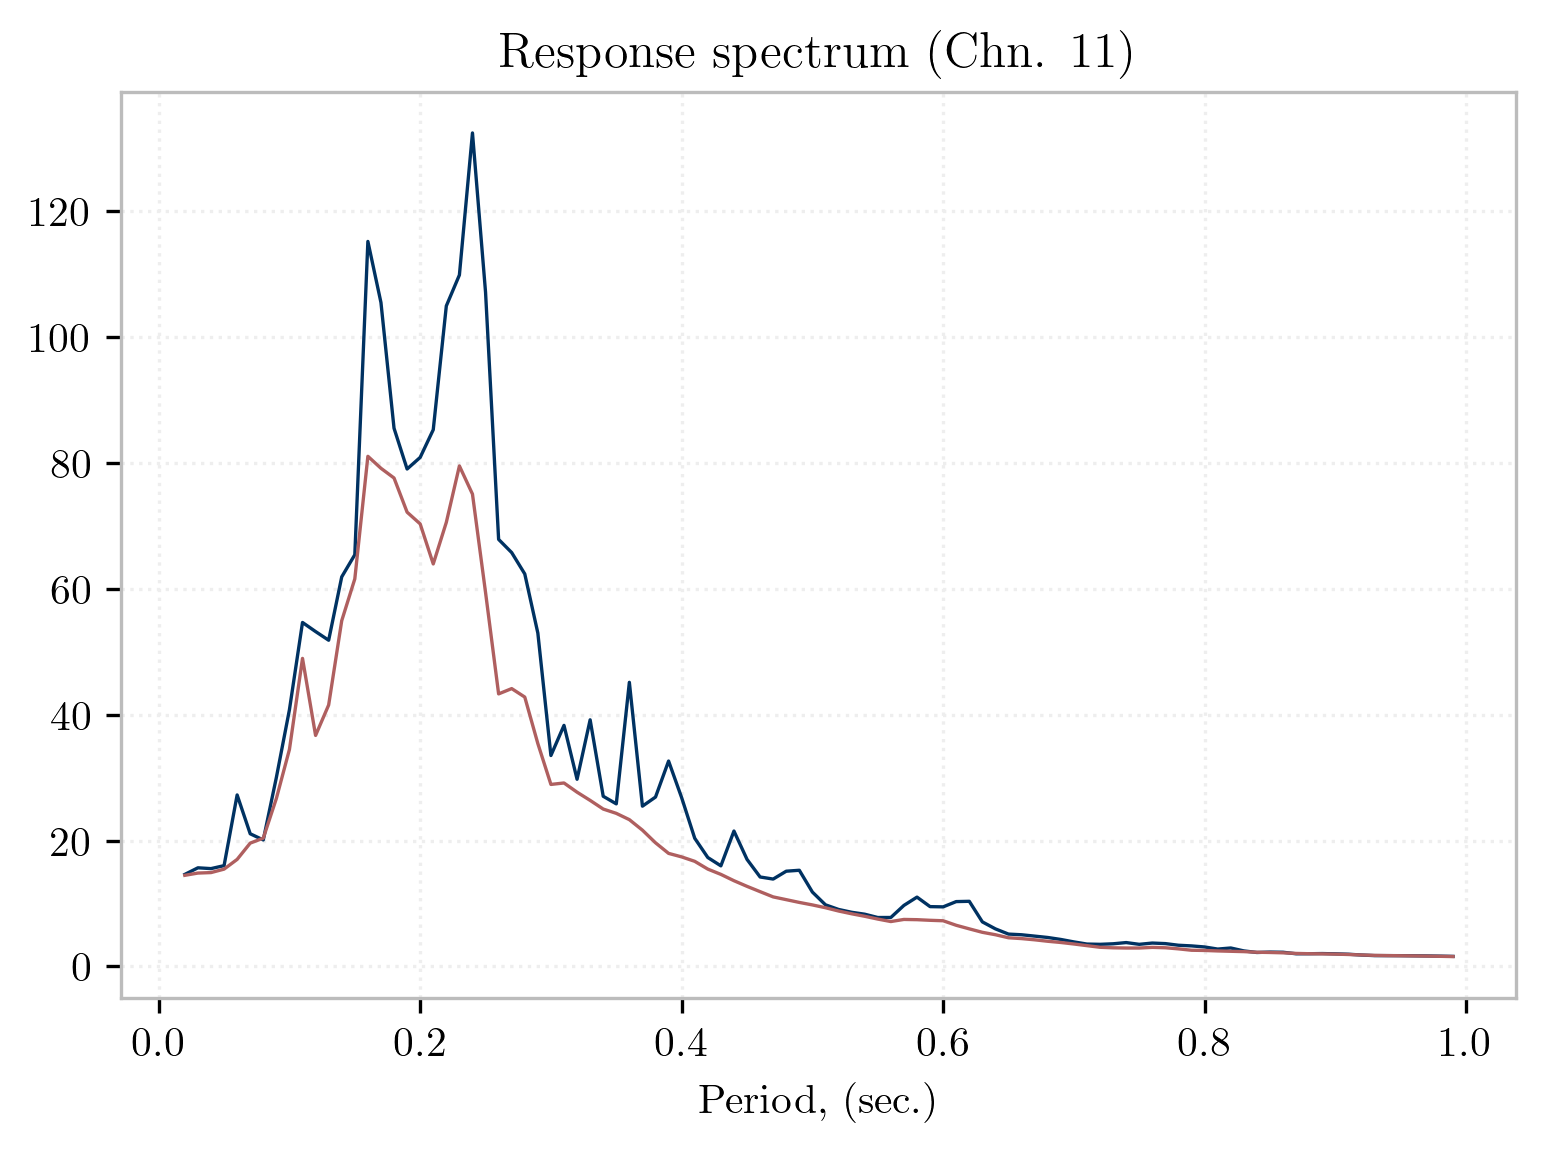

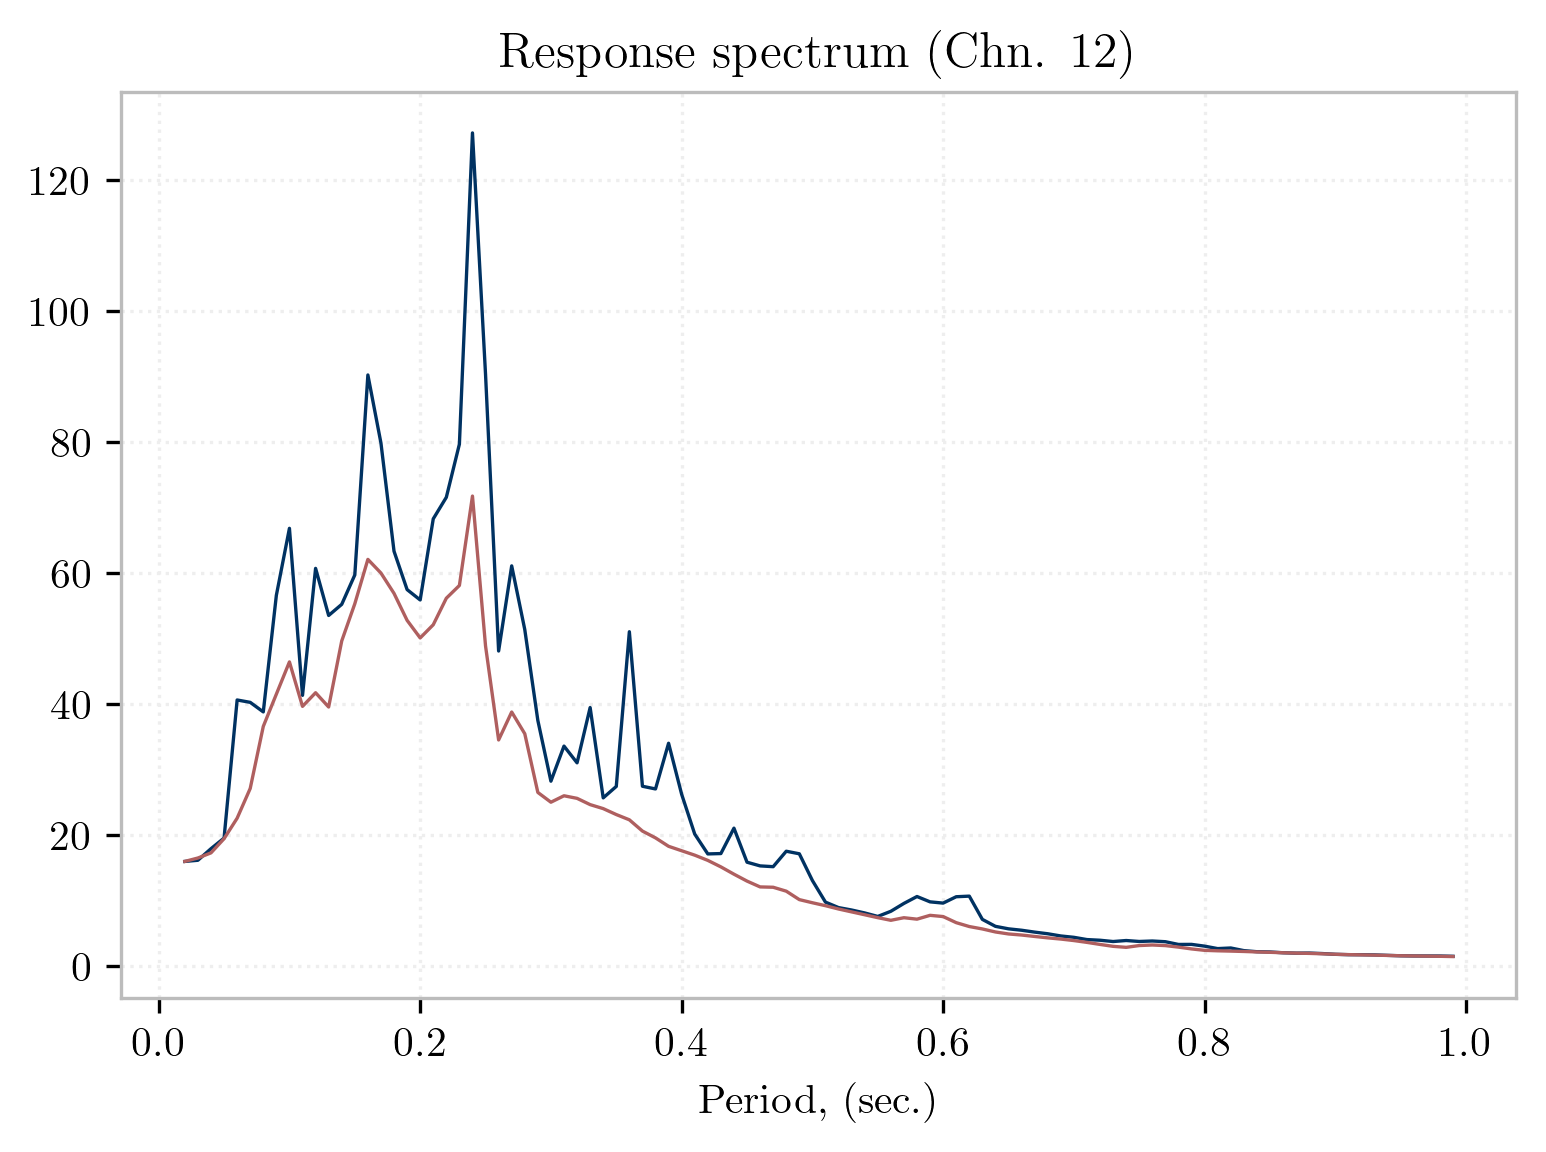

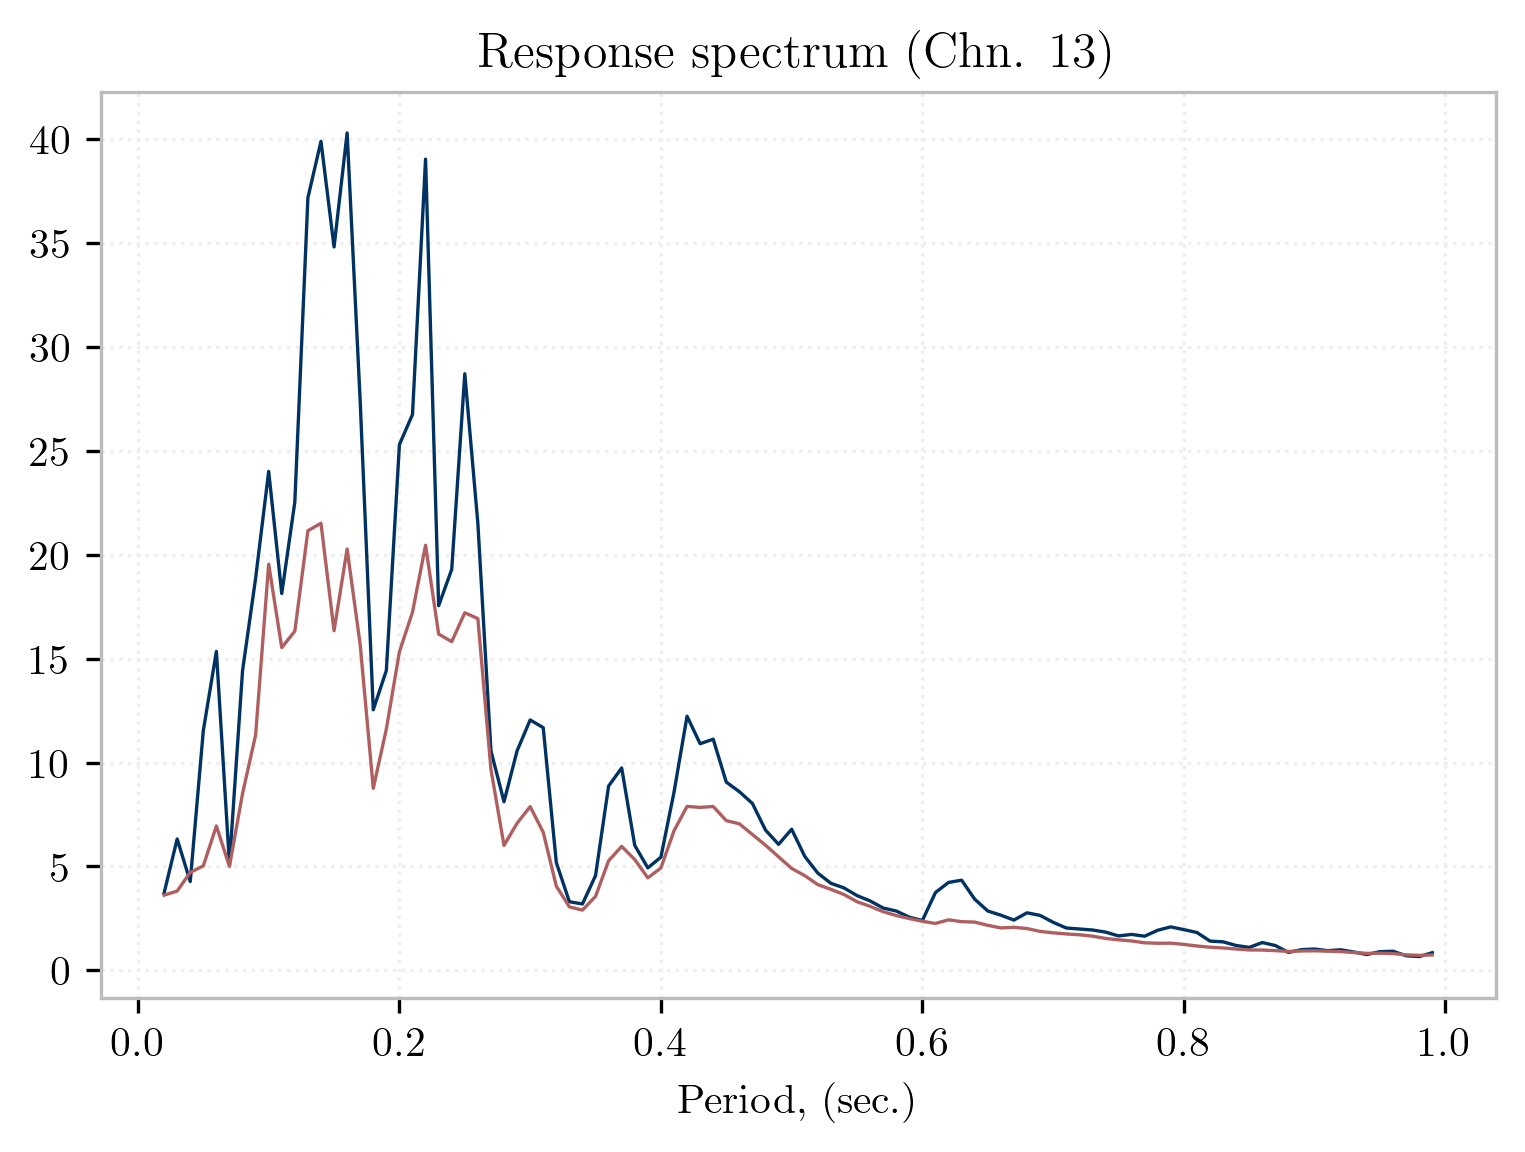

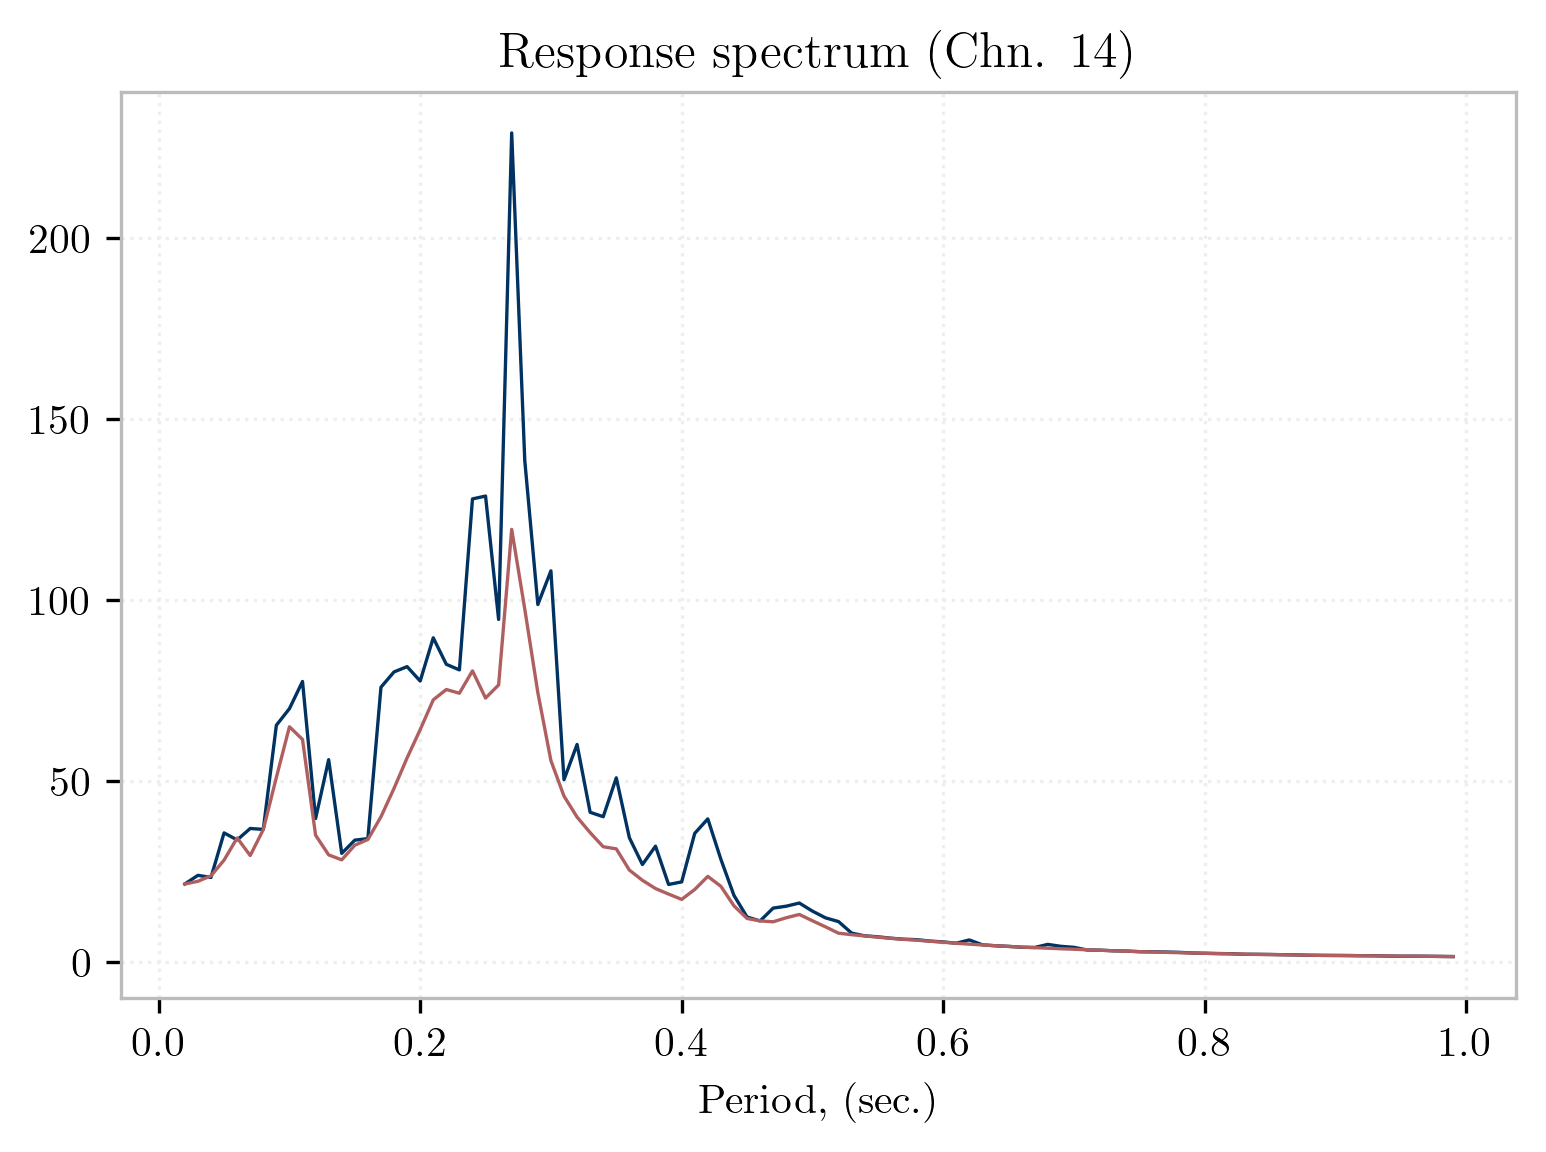

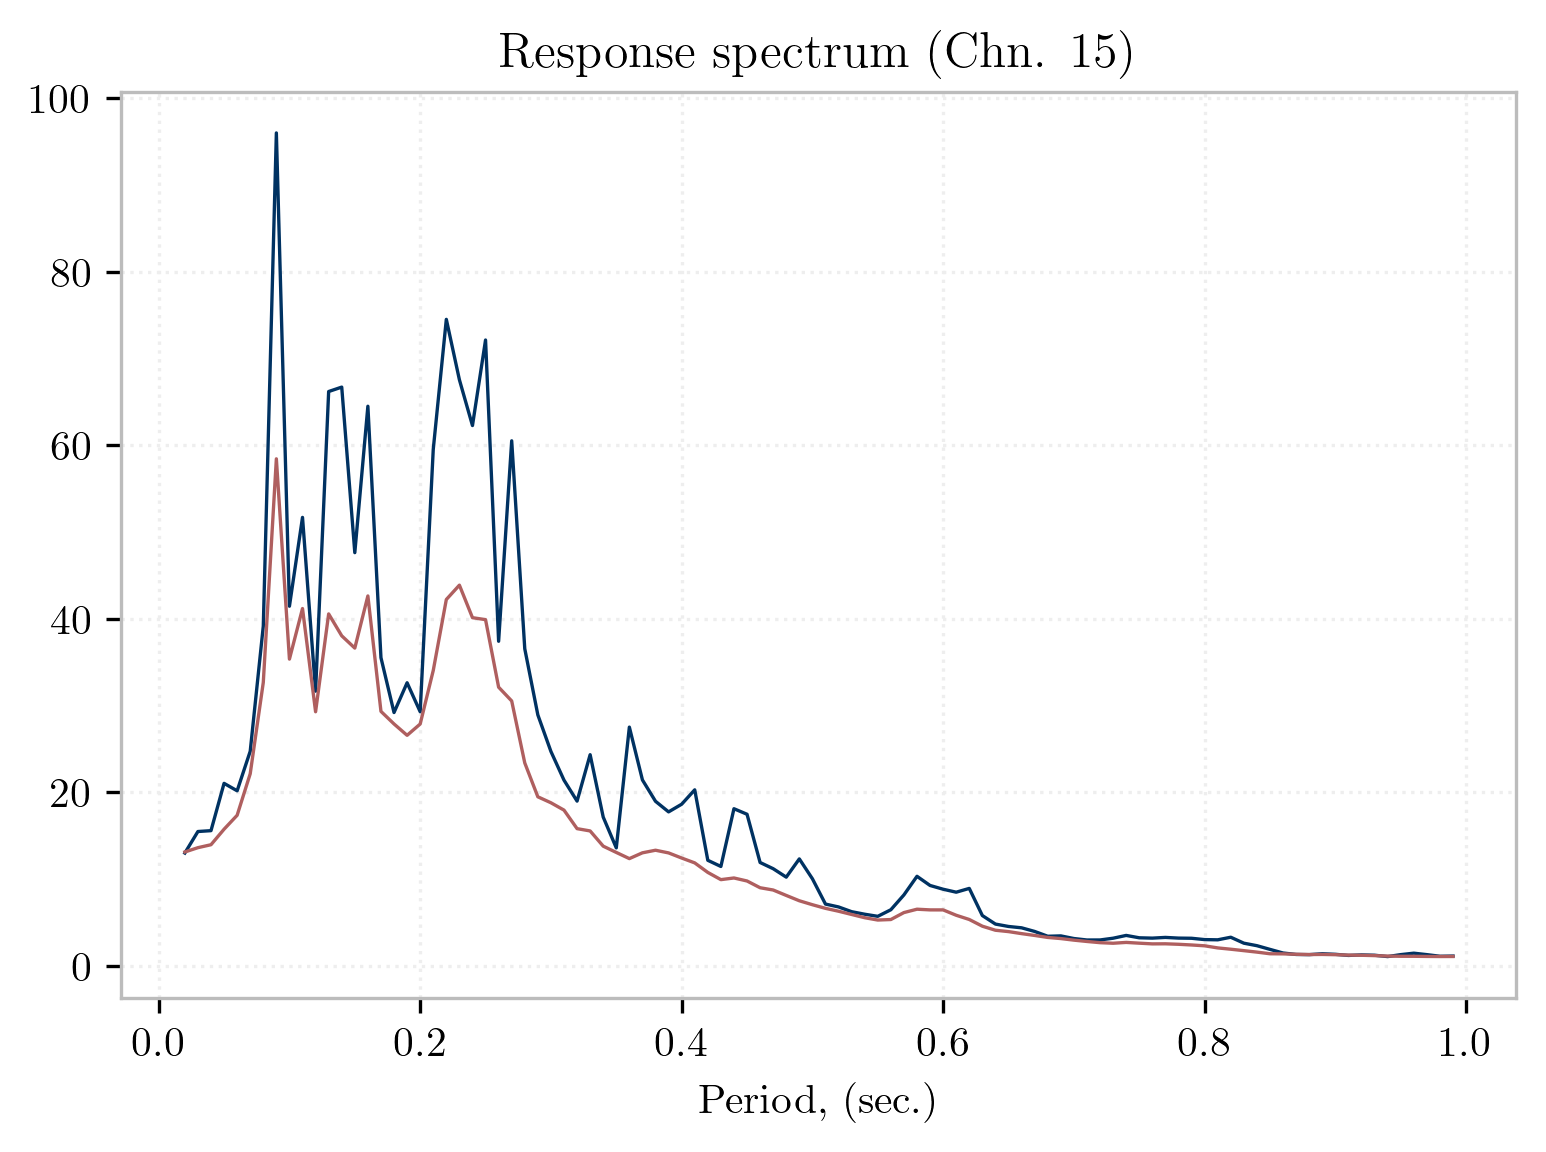

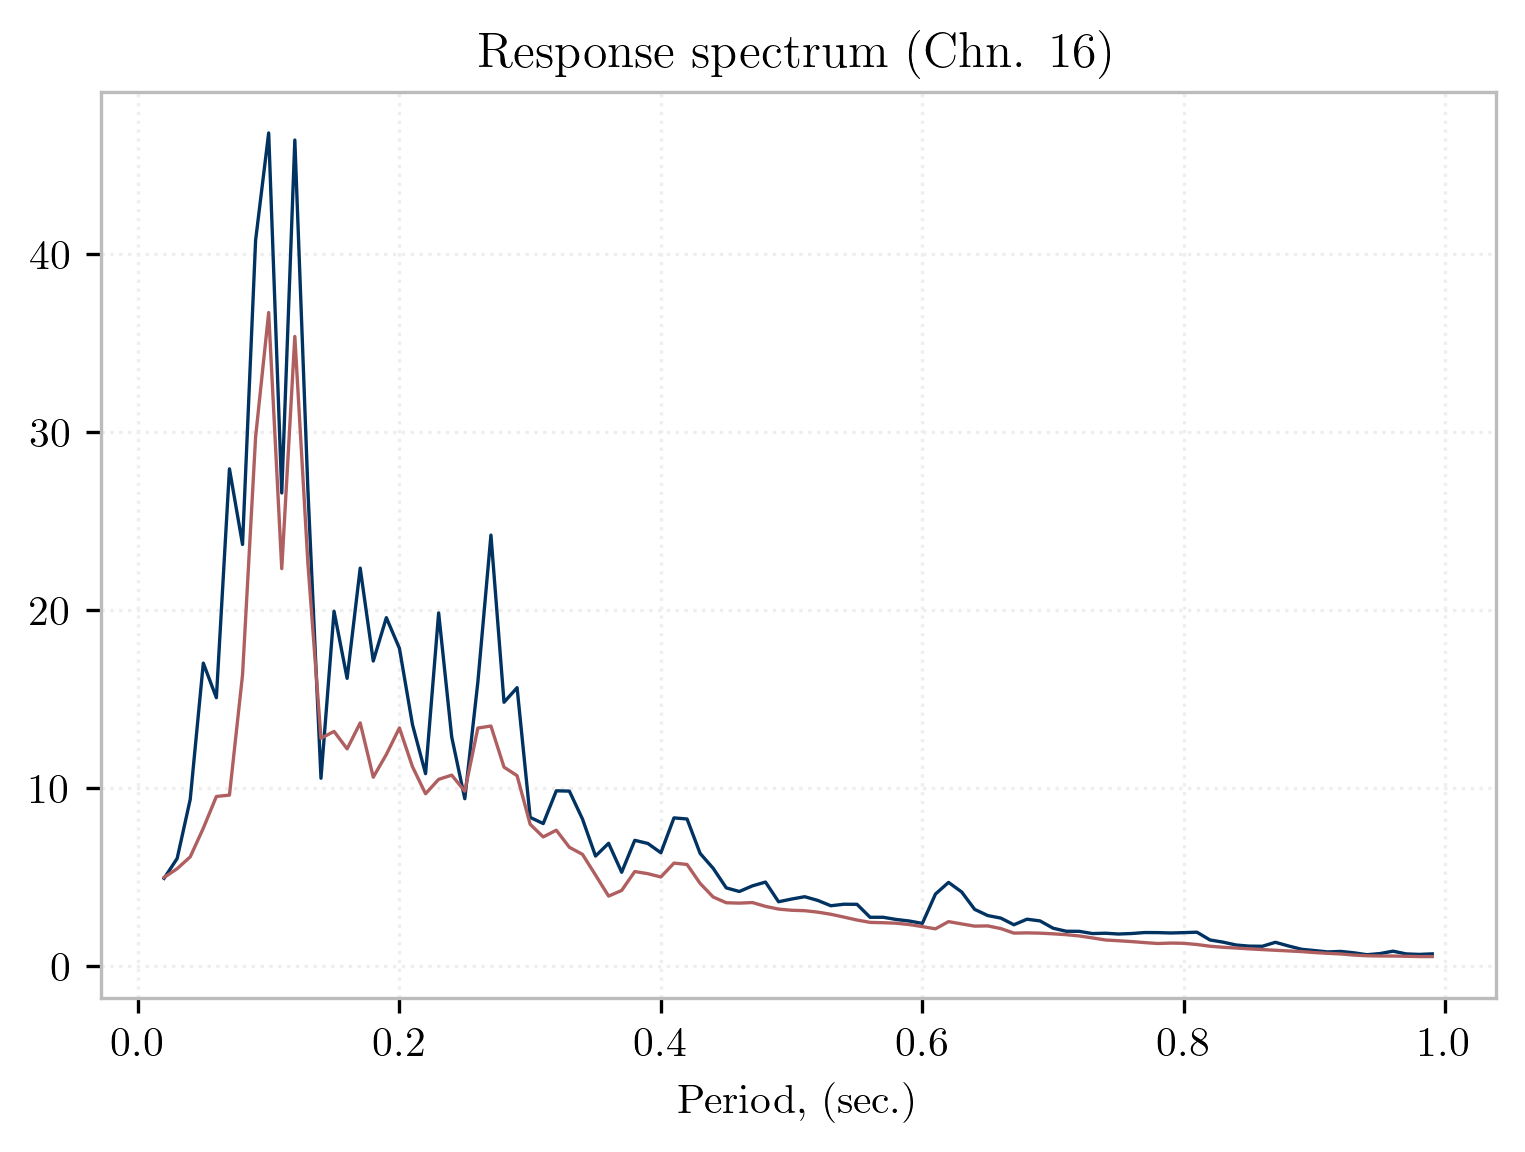

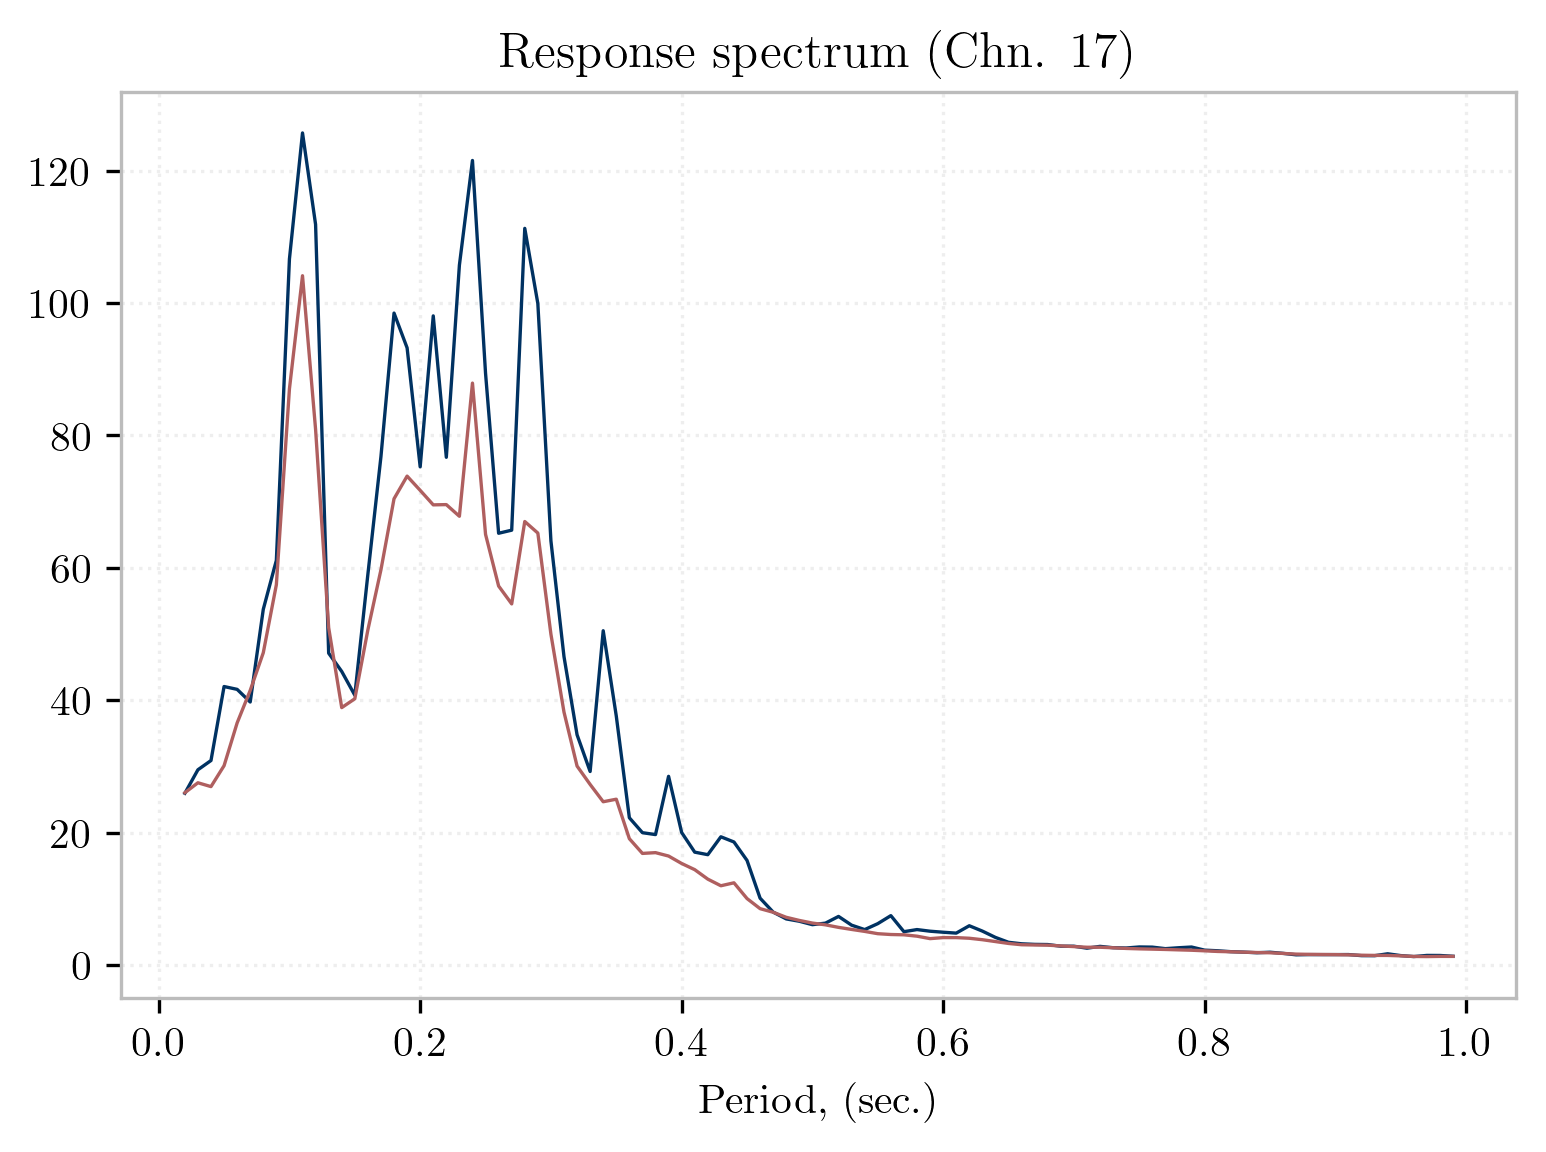

In [5]:
for component in collection.components:
    spec.Spectrum(component, damping=[0.0, 0.01]).plot()

In [6]:
spec.Spectrum(bot.long, damping=[0.0, 0.01]).spect(bot.long).shape

NameError: name 'bot' is not defined

In [ ]:
motion.long.veloc.data[-1]

In [ ]:
component.keys()